<a href="https://colab.research.google.com/github/soyoon-0118/2025-1-myclass-BDA/blob/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%8C%80%ED%94%8C%EA%B3%BC%EC%A0%9C_ipyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install -y fonts-nanum*
!rm -rf /root/.cache/matplotlib/* # 폰트 캐시 재설정
!apt-get install fonts-nanum* -qq

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20200506-1).
fonts-nanum-coding is already the newest version (2.5-3).
fonts-nanum-eco is already the newest version (1.000-7).
fonts-nanum-extra is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 서울 강수량 데이터 불러오기 및 데이터 확인

In [ ]:
df = pd.read_csv('data/서울강수량.csv', encoding='cp949') # CSV 파일 읽기

df

,년월,지점,강수량(mm)
0,2005-01-01,108,4.5
1,2005-02-01,108,17.2
2,2005-03-01,108,12.5
3,2005-04-01,108,94.7
4,2005-05-01,108,85.8
...,...,...,...
240,2025-01-01,108,19.5
241,2025-02-01,108,5.2
242,2025-03-01,108,38.2
243,2025-04-01,108,94.6


In [ ]:
df.info() # 데이터프레임 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   년월       245 non-null    object 
 1   지점       245 non-null    int64  
 2   강수량(mm)  245 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.9+ KB


In [ ]:
df.dtypes # 컬럼명과 데이터타입을 series 형태로 반환

,0
년월,object
지점,int64
강수량(mm),float64


In [ ]:
df.describe() # 통계량 요약

,지점,강수량(mm)
count,245.0,245.000000
mean,108.0,114.703673
std,0.0,159.686614
min,108.0,0.000000
25%,108.0,23.800000
50%,108.0,61.600000
75%,108.0,132.000000
max,108.0,1131.000000


In [ ]:
df.head(10)

,년월,지점,강수량(mm)
0,2005-01-01,108,4.5
1,2005-02-01,108,17.2
2,2005-03-01,108,12.5
3,2005-04-01,108,94.7
4,2005-05-01,108,85.8
5,2005-06-01,108,168.5
6,2005-07-01,108,269.4
7,2005-08-01,108,285.0
8,2005-09-01,108,313.3
9,2005-10-01,108,52.6


## 연도별 총 강수량 분석 및 시각화

In [ ]:
# 매년 총 강수량의 변화 추이를 살펴보고 기후 변화의 패턴을 파악.

date_col = '년월'
rain_col = '강수량(mm)'

df[date_col] = pd.to_datetime(df[date_col], errors='coerce') # 날짜 형식 변환
df[rain_col] = pd.to_numeric(df[rain_col], errors='coerce') # 강수량 숫자형으로 변환 (결측값은 NaN으로 처리)
df = df.dropna(subset=[date_col, rain_col]) # 결측치 제거
df['연도'] = df[date_col].dt.year # 연도 컬럼 생성
annual_rain = df.groupby('연도')[rain_col].sum() # 연도별 총 강수량 계산

print("연도별 총 강수량:\n", annual_rain)

연도별 총 강수량:
 연도
2005    1358.4
2006    1681.9
2007    1212.3
2008    1356.3
2009    1564.0
2010    2043.5
2011    2039.3
2012    1646.3
2013    1403.8
2014     808.9
2015     792.1
2016     991.7
2017    1233.2
2018    1284.1
2019     891.3
2020    1651.1
2021    1186.5
2022    1775.3
2023    1598.8
2024    1311.4
2025     272.2
Name: 강수량(mm), dtype: float64


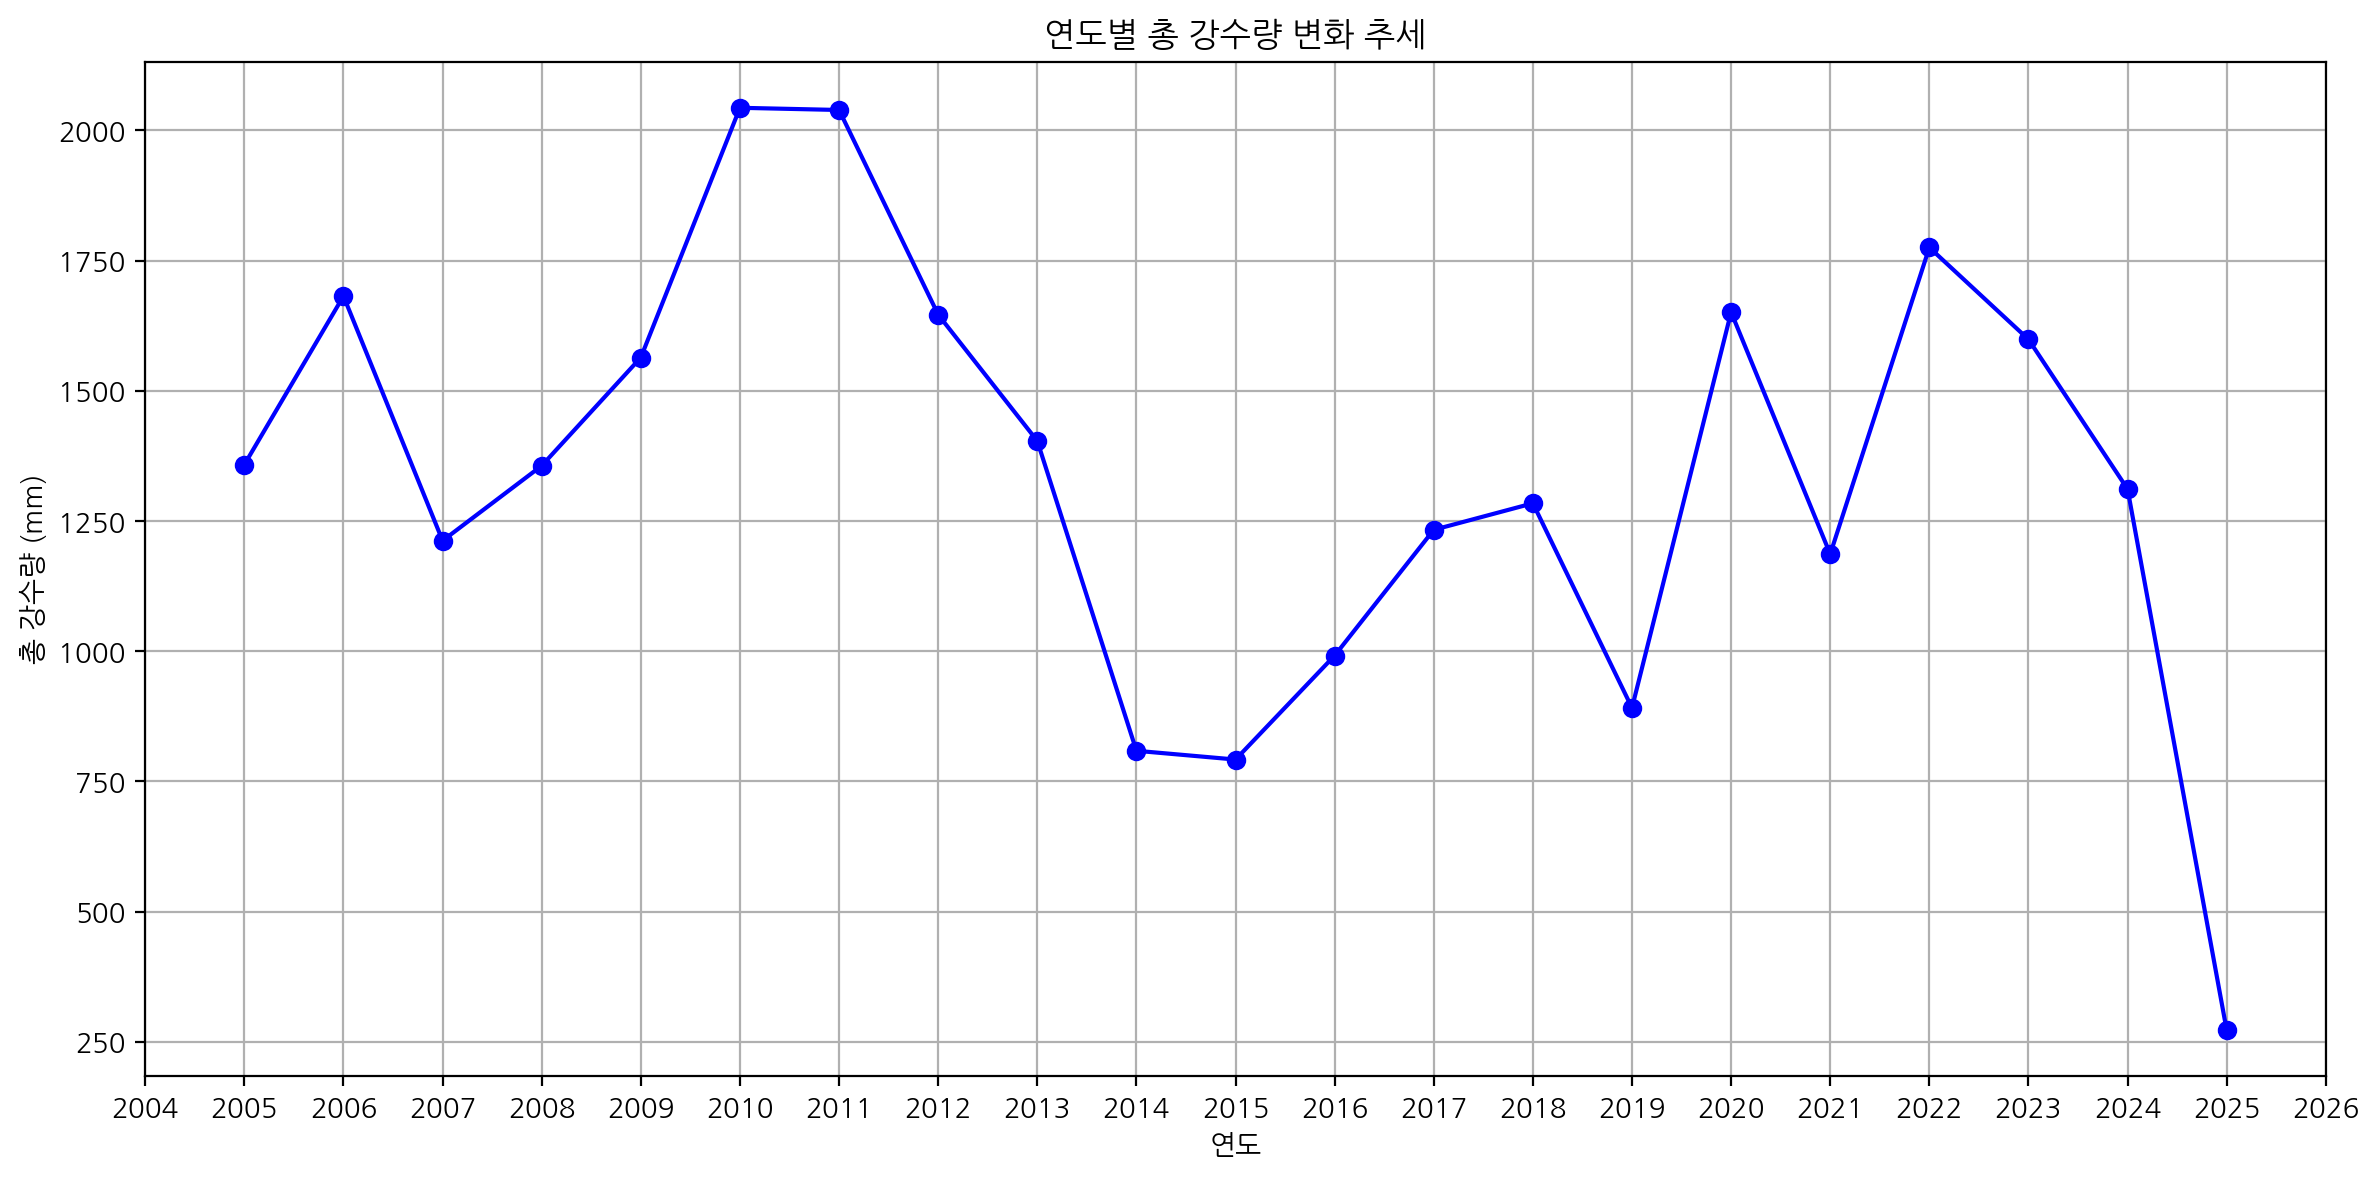

In [ ]:
# 시각화


import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker

plt.rc('font', family='NanumGothic') # 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 음수 부호 깨짐 방지

%config InlineBackend.figure_format = 'retina' # 그림 선명하게

plt.figure(figsize=(12,6))
plt.plot(annual_rain.index, annual_rain.values, marker='o', linestyle='-', color='b')

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.title('연도별 총 강수량 변화 추세')
plt.xlabel('연도')
plt.ylabel('총 강수량 (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()

## 계절별 강수량 분포 분석

In [ ]:
# 봄, 여름, 가을, 겨울로 나눠 강수량의 평균 및 분포를 분석하여 계절 특성 파악.

df_clean = df.copy()

# 월 컬럼 생성
df['일자'] = pd.to_datetime(df['년월'], errors='coerce')
df['강수량(mm)'] = pd.to_numeric(df['강수량(mm)'], errors='coerce')


df['월'] = df['일자'].dt.month # 날짜 컬럼에서 월 추출

# 계절 구분 함수
def get_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

# 계절 컬럼 추가
df['계절'] = df['월'].apply(get_season)

# 계절별 평균 강수량
seasonal_mean = df.groupby('계절')['강수량(mm)'].mean().reindex(['봄', '여름', '가을', '겨울'])
print("계절별 평균 강수량 (mm):\n", seasonal_mean)

계절별 평균 강수량 (mm):
 계절
봄      71.871429
여름    283.050000
가을     86.691667
겨울     22.419355
Name: 강수량(mm), dtype: float64


<ipython-input-13-9750b397864c>:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


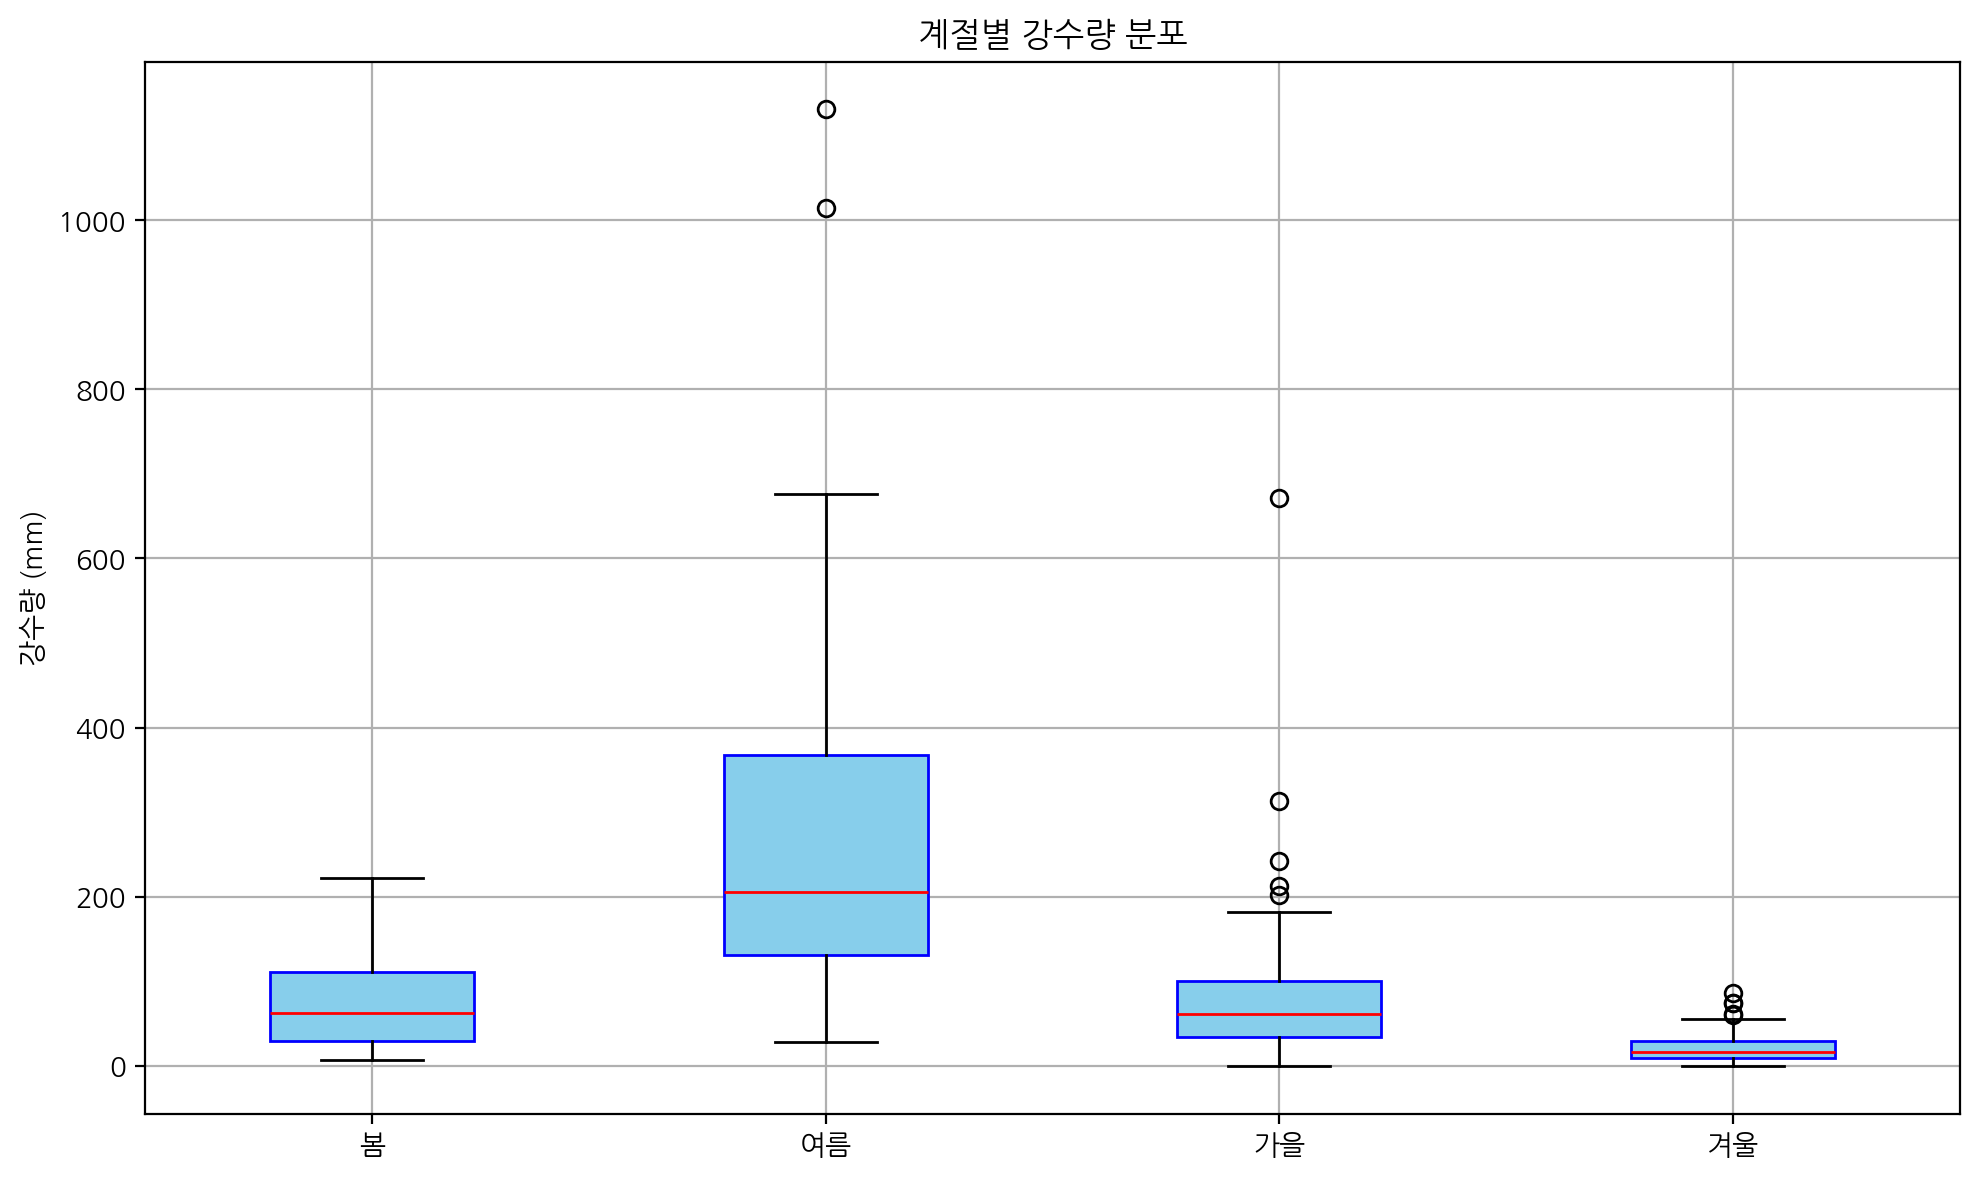

In [ ]:
# 시각화: 계절별 강수량 분포 (boxplot)
plt.rc('font', family='NanumGothic')  # 한글 폰트
plt.rcParams['axes.unicode_minus'] = False  # 음수 깨짐 방지

plt.figure(figsize=(10,6))
plt.boxplot(
    [df[df['계절'] == s]['강수량(mm)'].dropna() for s in ['봄', '여름', '가을', '겨울']],
    labels=['봄', '여름', '가을', '겨울'],
    patch_artist=True,
    boxprops=dict(facecolor='skyblue', color='blue'),
    medianprops=dict(color='red')
)
plt.title('계절별 강수량 분포')
plt.ylabel('강수량 (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()

## 월별 강수량 평균 및 분포 분석

In [ ]:
# 월별 평균 강수량 계산
monthly_avg = df.groupby('월')['강수량(mm)'].mean()

# 결과 출력
print("월별 평균 강수량 (mm):\n", monthly_avg)

월별 평균 강수량 (mm):
 월
1      17.138095
2      26.357143
3      42.357143
4      71.800000
5     101.457143
6     142.695000
7     437.215000
8     269.240000
9     148.020000
10     54.925000
11     57.130000
12     23.830000
Name: 강수량(mm), dtype: float64


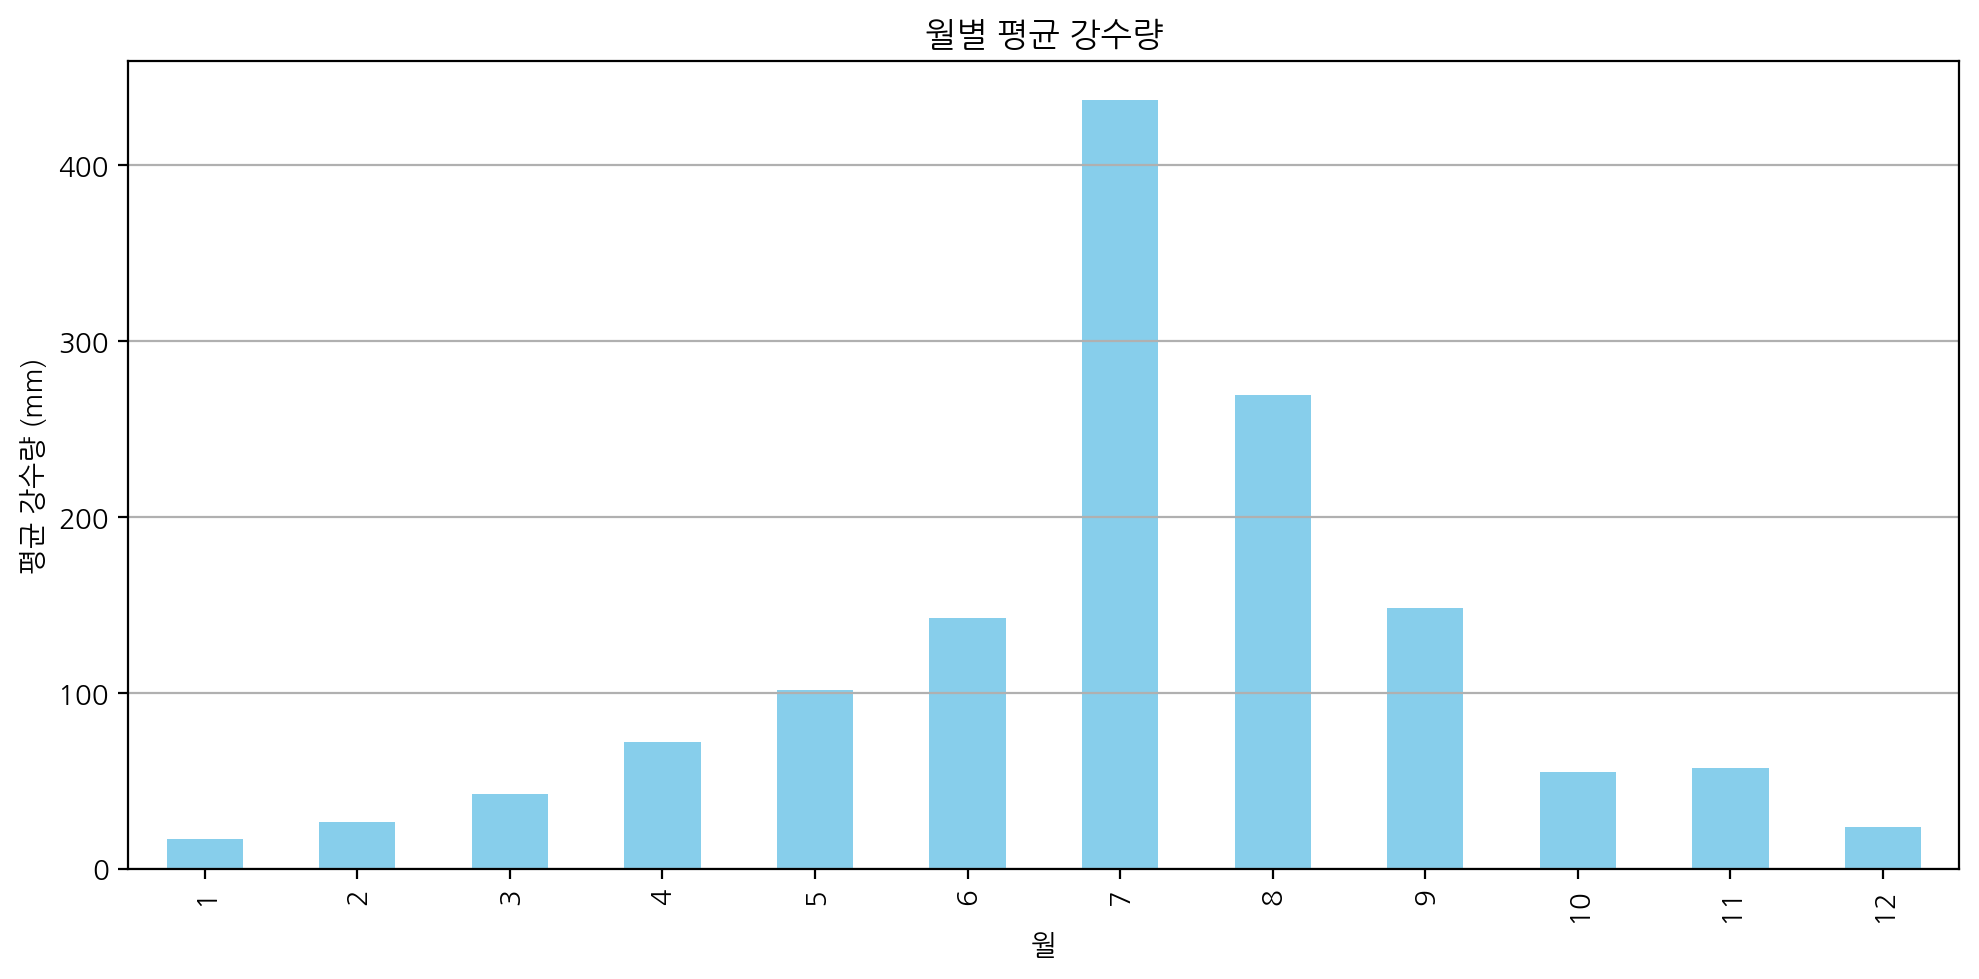

In [ ]:
# 월별 강수량 분포 시각화 - 막대그래프
plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('월별 평균 강수량')
plt.xlabel('월')
plt.ylabel('평균 강수량 (mm)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

<ipython-input-16-5b789f28d4e2>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


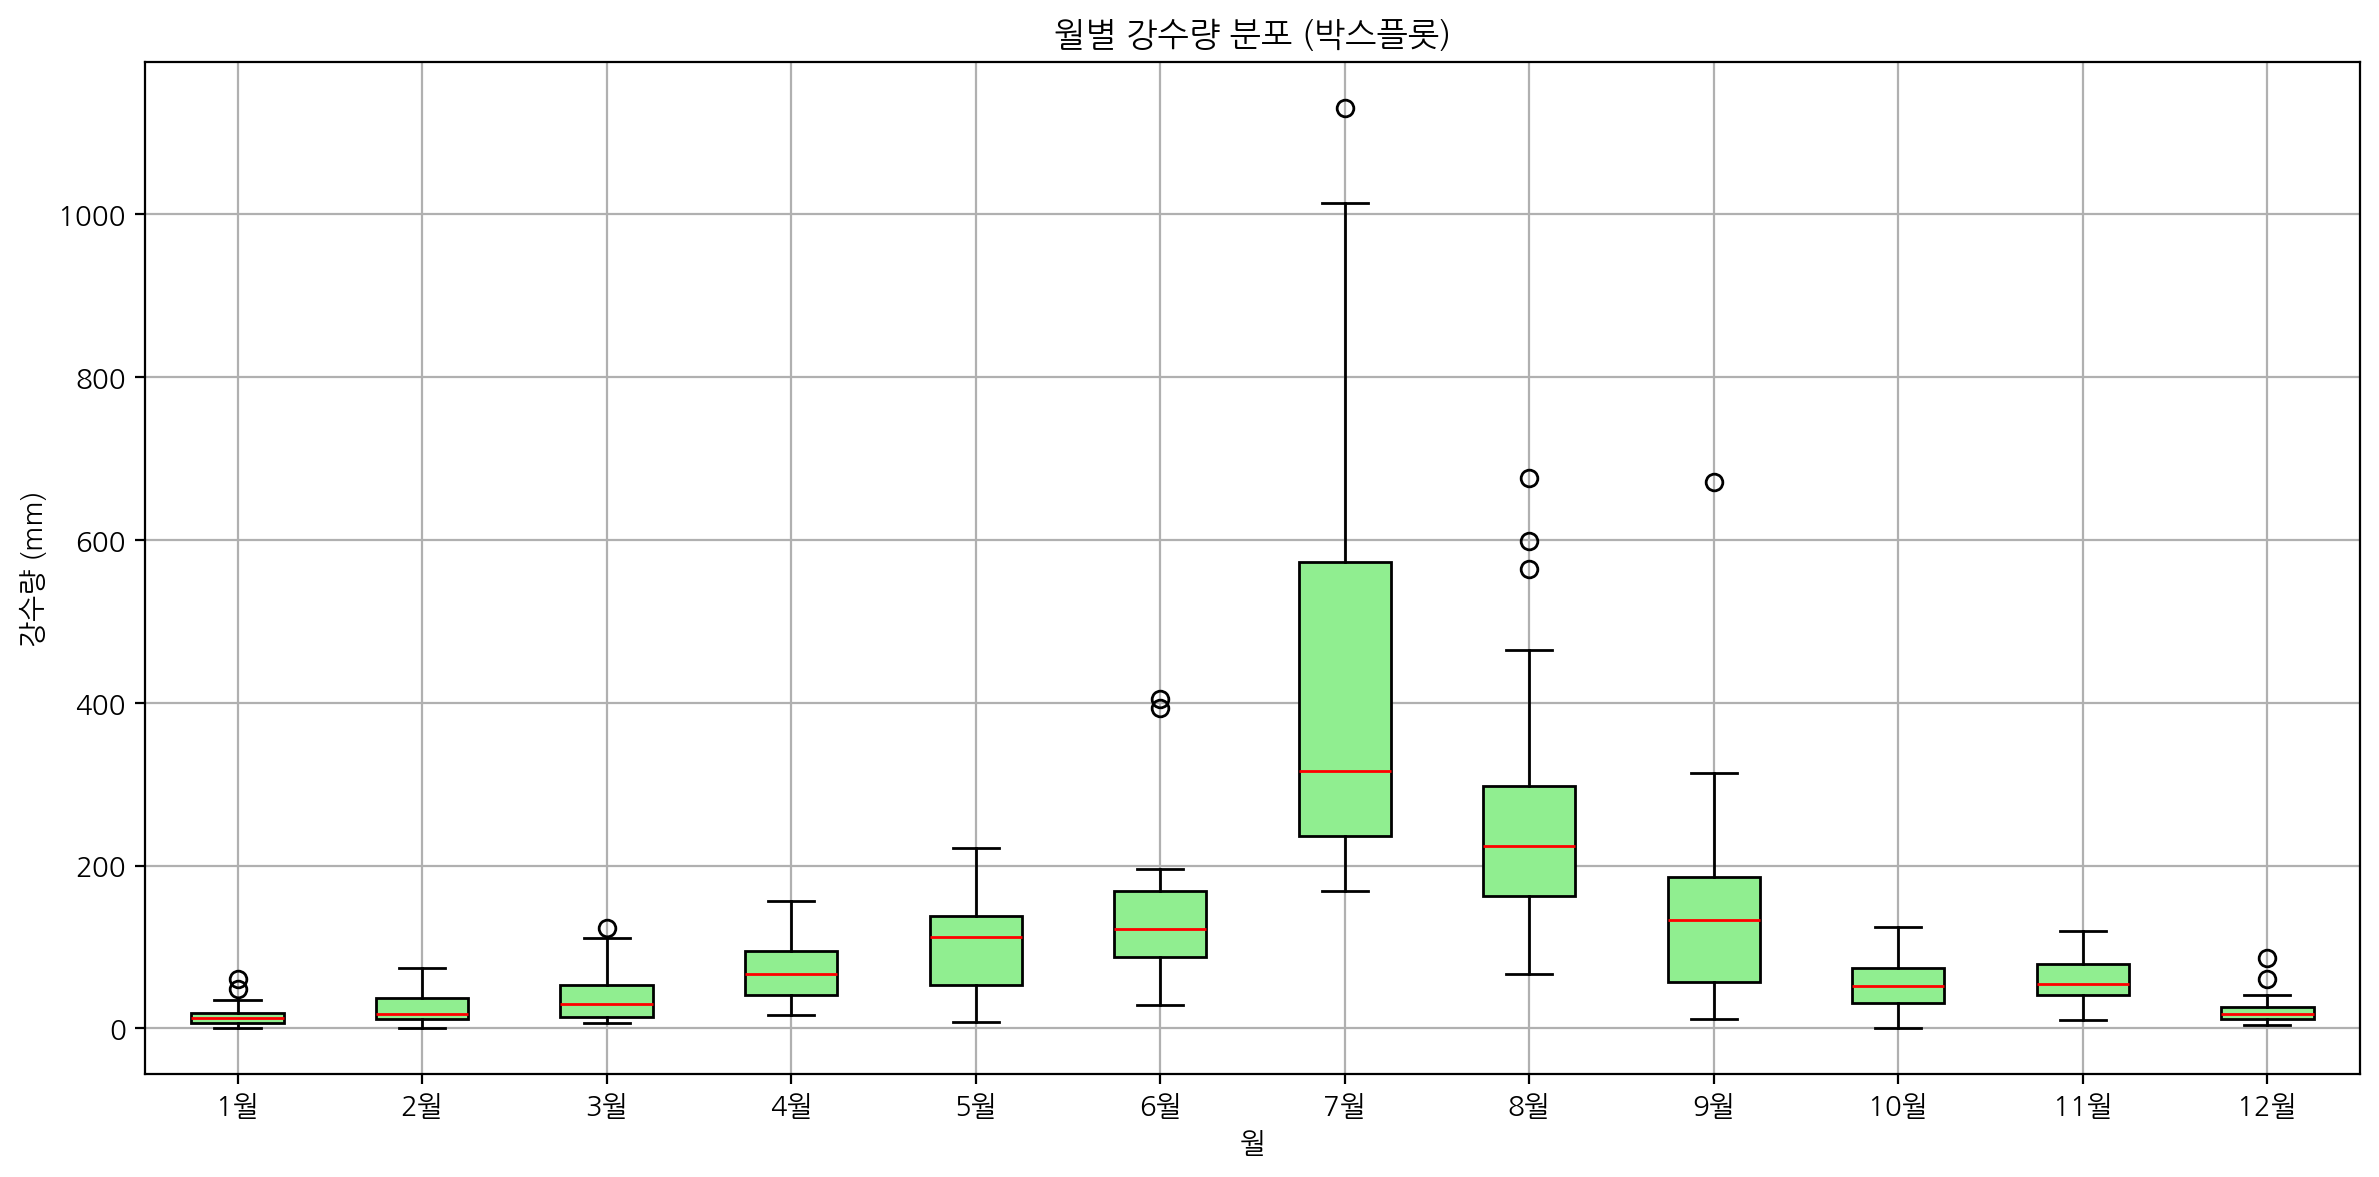

In [ ]:
# 월별 강수량 분포 시각화 - 박스 플롯

plt.figure(figsize=(12, 6))
plt.boxplot(
    [df[df['월'] == m]['강수량(mm)'].dropna() for m in range(1, 13)],
    labels=[str(m) + '월' for m in range(1, 13)],
    patch_artist=True,
    boxprops=dict(facecolor='lightgreen'),
    medianprops=dict(color='red')
)
plt.title('월별 강수량 분포 (박스플롯)')
plt.xlabel('월')
plt.ylabel('강수량 (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()

## 폭우 발생 빈도 분석

In [ ]:
#  폭우일 정의 및 필터링

threshold = 50 # 폭우 기준 정의 (예: 50mm 이상)

heavy_rain_df = df[df['강수량(mm)'] >= threshold].copy() # 폭우일 필터링

# 연도, 월 컬럼 추가
heavy_rain_df['연도'] = heavy_rain_df['일자'].dt.year
heavy_rain_df['월'] = heavy_rain_df['일자'].dt.month

In [ ]:
# 연도별 폭우 발생일 수
annual_counts = heavy_rain_df['연도'].value_counts().sort_index()

# 월별 폭우 누적 발생일 수 (전체 연도 합산)
monthly_counts = heavy_rain_df['월'].value_counts().sort_index()

In [ ]:
print("연도별 폭우 발생일 수 : ",annual_counts)

연도별 폭우 발생일 수 :  연도
2005    7
2006    5
2007    6
2008    6
2009    9
2010    8
2011    6
2012    7
2013    6
2014    6
2015    6
2016    7
2017    4
2018    8
2019    6
2020    8
2021    9
2022    7
2023    8
2024    8
2025    2
Name: count, dtype: int64


In [ ]:
print("월별 폭우 누적 발생일 수 : ",monthly_counts)

월별 폭우 누적 발생일 수 :  월
1      1
2      4
3      6
4     14
5     16
6     19
7     20
8     20
9     15
10    11
11    11
12     2
Name: count, dtype: int64


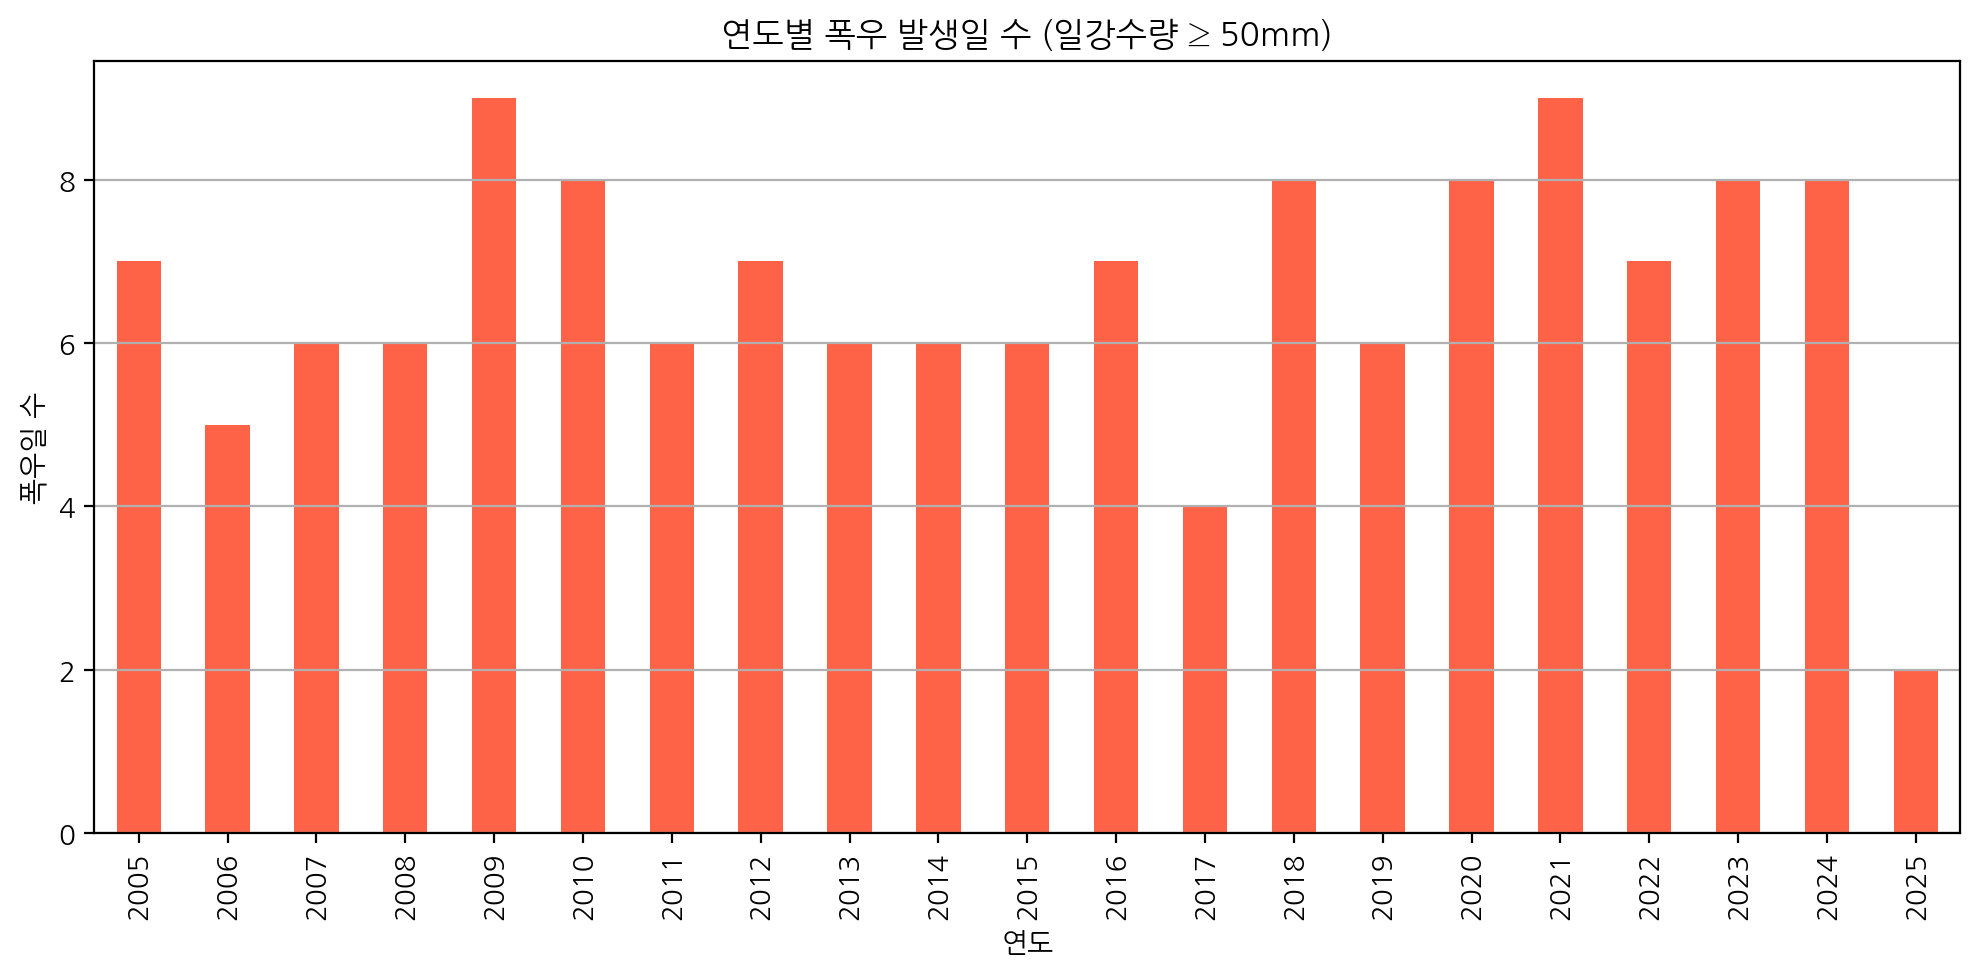

In [ ]:
# 연도별 폭우 발생일 수
plt.figure(figsize=(10, 5))
annual_counts.plot(kind='bar', color='tomato')
plt.title(f'연도별 폭우 발생일 수 (일강수량 ≥ {threshold}mm)')
plt.xlabel('연도')
plt.ylabel('폭우일 수')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

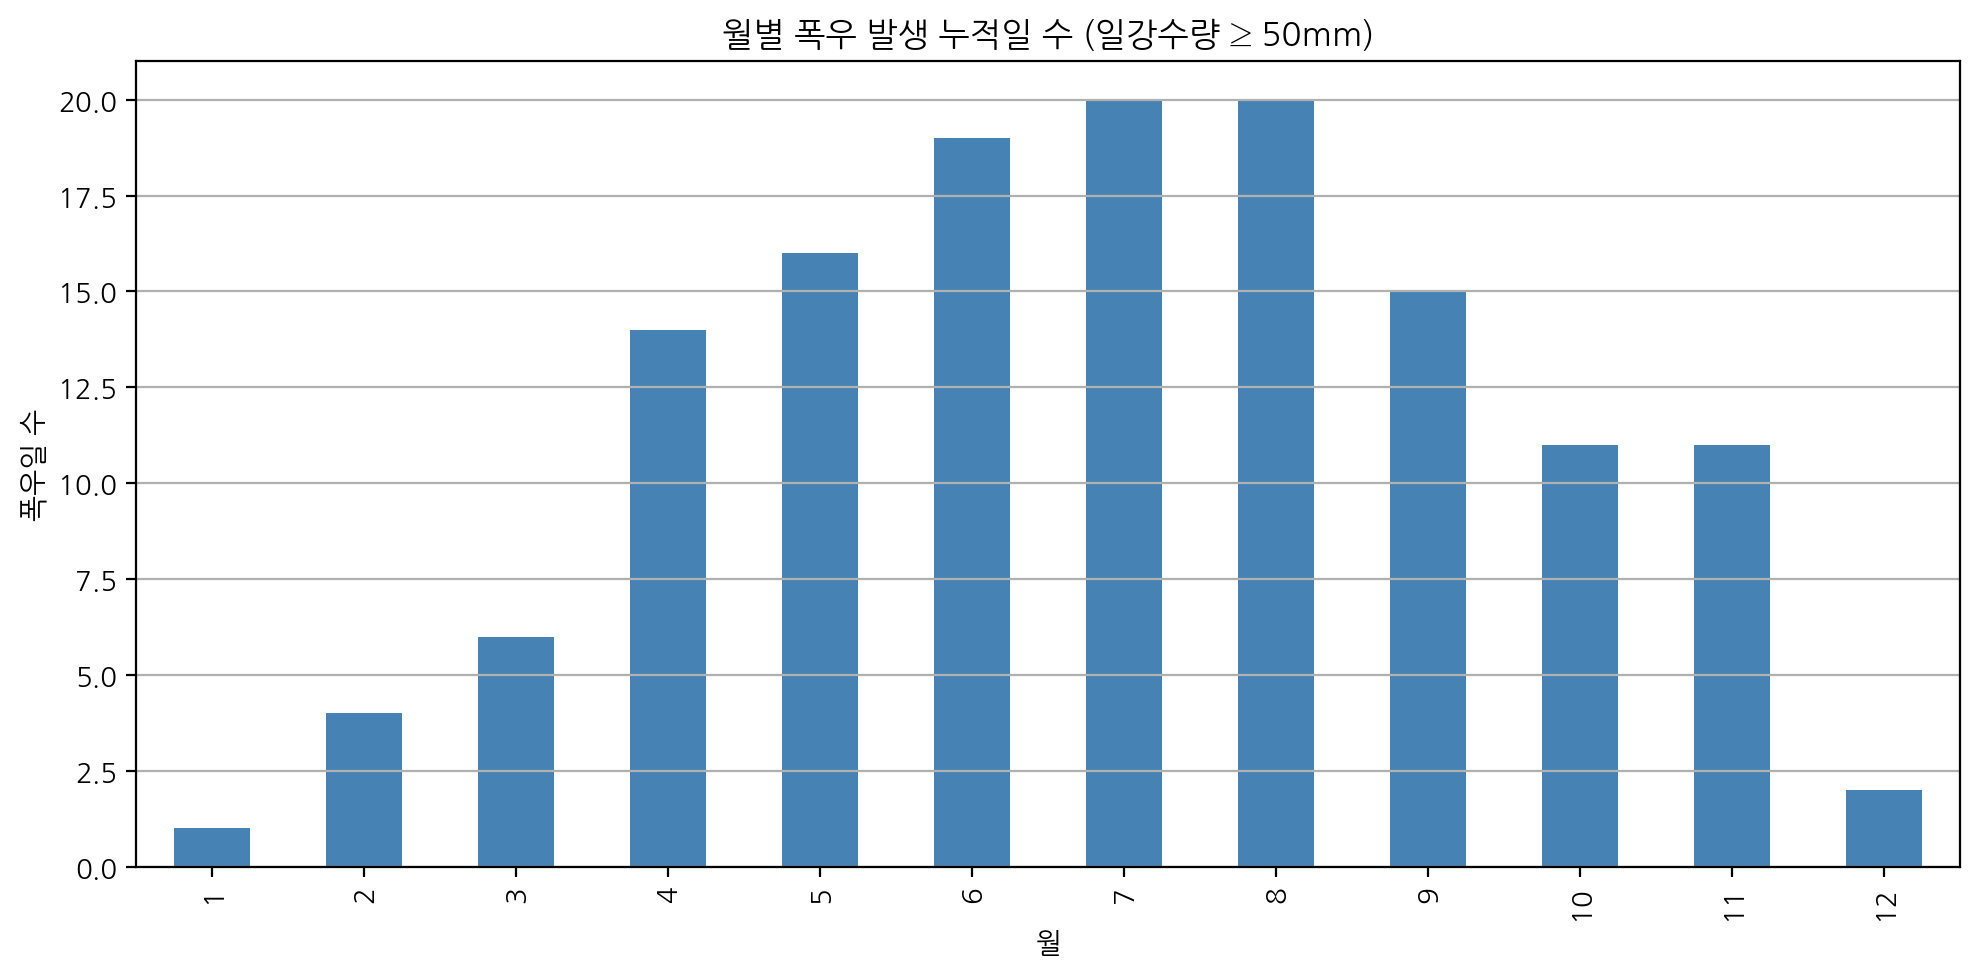

In [ ]:
# 월별 폭우 발생 누적일 수
plt.figure(figsize=(10, 5))
monthly_counts.plot(kind='bar', color='steelblue')
plt.title(f'월별 폭우 발생 누적일 수 (일강수량 ≥ {threshold}mm)')
plt.xlabel('월')
plt.ylabel('폭우일 수')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

## 기후 이상 여부 탐지 (극단값 분석)

In [ ]:
# 평년보다 유의하게 높은/낮은 강수량이 있었던 시기 탐지.

# IQR: 사분위수 범위를 기준으로 통계적 이상값 탐지
# 이상값: 일반적인 수준보다 매우 높거나 낮은 강수량을 의미

In [ ]:
# 기본적인 날짜 처리
if '연도' in df.columns and '월' in df.columns:
    df['날짜'] = pd.to_datetime(df['연도'].astype(str) + '-' + df['월'].astype(str) + '-01')
    df.set_index('날짜', inplace=True)

rain_col = '강수량(mm)'

# 평년값 계산 (월별 평균)
df['편차'] = df.apply(lambda row: row[rain_col] - monthly_avg.loc[row['월']], axis=1)

print(monthly_avg)

날짜
1      17.138095
2      26.357143
3      42.357143
4      71.800000
5     101.457143
6     142.695000
7     437.215000
8     269.240000
9     148.020000
10     54.925000
11     57.130000
12     23.830000
Name: 강수량(mm), dtype: float64


In [ ]:
# 편차 계산
df['월'] = df.index.month
df['편차'] = df[rain_col] - df['월'].map(monthly_avg)

# IQR 기반 이상치 탐지
Q1 = df['편차'].quantile(0.25)
Q3 = df['편차'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상값 표시
df['이상값'] = (df['편차'] < lower_bound) | (df['편차'] > upper_bound)

# 이상값 출력
print("이상 강수량이 관측된 시기:")
print(df[df['이상값']][[rain_col, '편차']])

이상 강수량이 관측된 시기:
            강수량(mm)          편차
날짜                             
2005-07-01    269.4 -167.815000
2005-09-01    313.3  165.280000
2006-07-01   1014.0  576.785000
2006-08-01    121.2 -148.040000
2006-09-01     11.1 -136.920000
2007-07-01    274.1 -163.115000
2009-07-01    659.4  222.185000
2010-07-01    239.2 -198.015000
2010-08-01    598.7  329.460000
2010-09-01    671.5  523.480000
2011-06-01    404.5  261.805000
2011-07-01   1131.0  693.785000
2011-09-01     25.6 -122.420000
2012-08-01    464.9  195.660000
2013-06-01     28.3 -114.395000
2013-07-01    676.2  238.985000
2013-08-01    148.6 -120.640000
2014-07-01    207.9 -229.315000
2015-07-01    226.0 -211.215000
2015-08-01     72.9 -196.340000
2015-09-01     26.0 -122.020000
2016-08-01     67.1 -202.140000
2016-09-01     33.0 -115.020000
2017-07-01    621.0  183.785000
2017-09-01     35.0 -113.020000
2018-05-01    222.0  120.542857
2018-07-01    185.6 -251.615000
2019-07-01    194.4 -242.815000
2020-07-01    270.4 -166

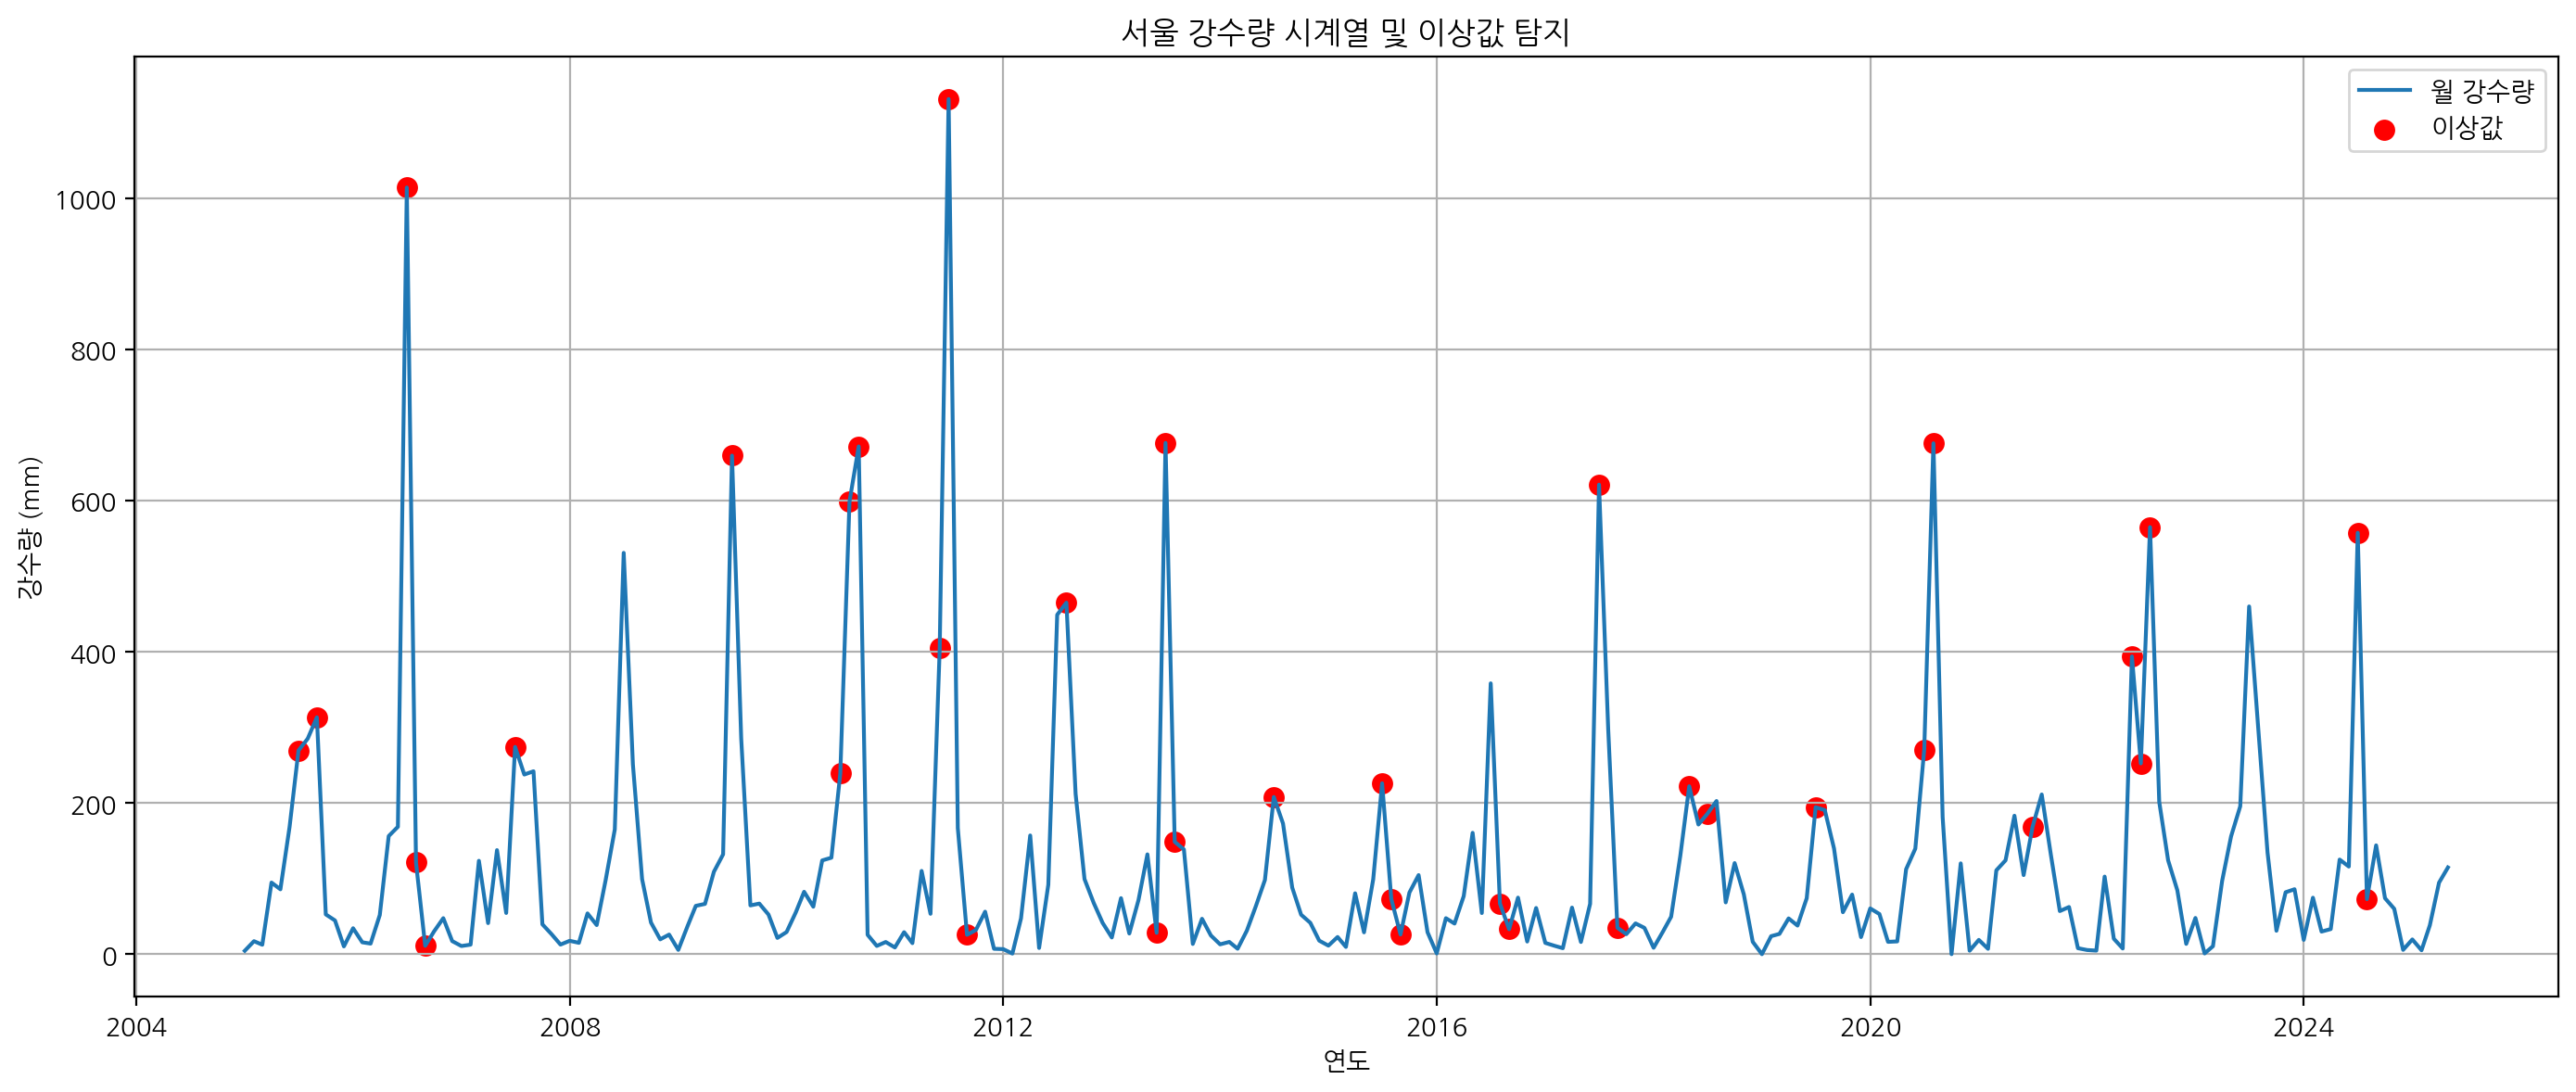

In [ ]:
# 시각화
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x=df.index, y=rain_col, label='월 강수량')
sns.scatterplot(data=df[df['이상값']], x=df[df['이상값']].index, y=rain_col, color='red', label='이상값', s=80)
plt.title('서울 강수량 시계열 및 이상값 탐지')
plt.xlabel('연도')
plt.ylabel('강수량 (mm)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## 서울 강수량과 장마 기간 비교

In [ ]:
# 장마철(6~7월) 강수량 집중 현상과 일반 시기 비교.

rain_col = '강수량(mm)'

# 장마철 여부 추가
df['장마철'] = df['월'].apply(lambda x: '장마철' if x in [6, 7] else '비장마철')

# 그룹별 평균 및 합계
grouped = df.groupby(['연도', '장마철'])[rain_col].sum().unstack()

# 비율 계산: 장마철 강수량 비중 (%)
grouped['장마철비중(%)'] = (grouped['장마철'] / (grouped['장마철'] + grouped['비장마철'])) * 100

# 출력: 최근 연도 순으로 상위 10개 표시
print("연도별 장마철 vs 비장마철 강수량 합계 및 비중:")
print(grouped.sort_index(ascending=False).head(10))


연도별 장마철 vs 비장마철 강수량 합계 및 비중:
장마철     비장마철    장마철   장마철비중(%)
연도                            
2025   272.2    NaN        NaN
2024   638.2  673.2  51.334452
2023   943.3  655.5  40.999500
2022  1129.2  646.1  36.393849
2021   913.6  272.9  23.000421
2020  1241.1  410.0  24.831930
2019   622.9  268.4  30.113318
2018   927.0  357.1  27.809361
2017   545.6  687.6  55.757379
2016   579.1  412.6  41.605324


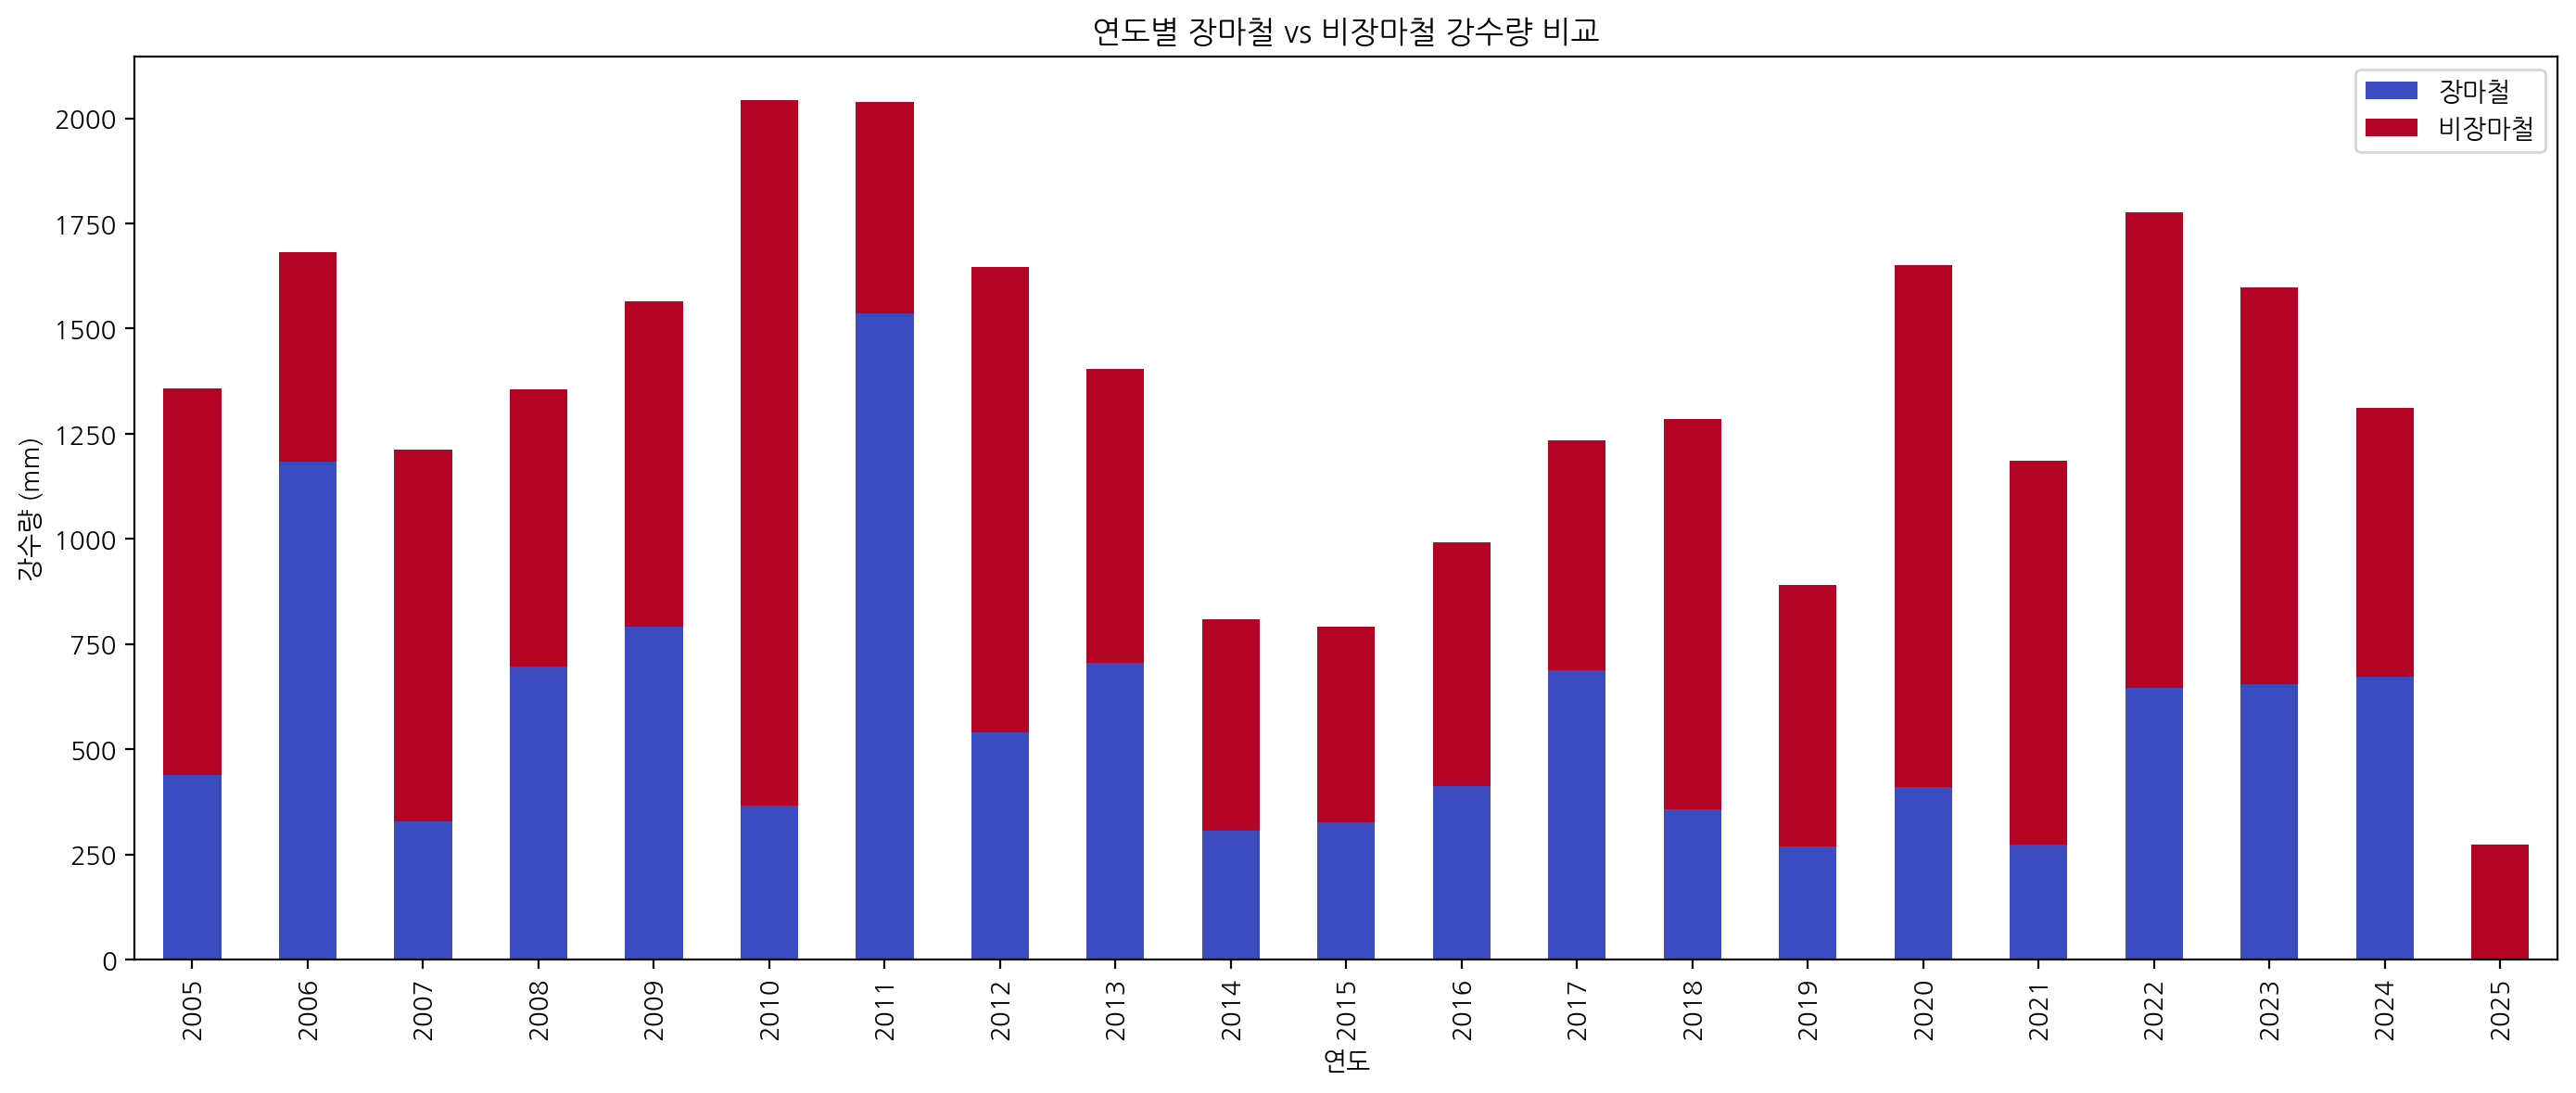

In [ ]:
# 시각화 - 연도별 강수량 막대 그래프
grouped_plot = grouped[['장마철', '비장마철']]
grouped_plot.plot(kind='bar', stacked=True, figsize=(14,6), colormap='coolwarm')
plt.title('연도별 장마철 vs 비장마철 강수량 비교')
plt.ylabel('강수량 (mm)')
plt.xlabel('연도')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

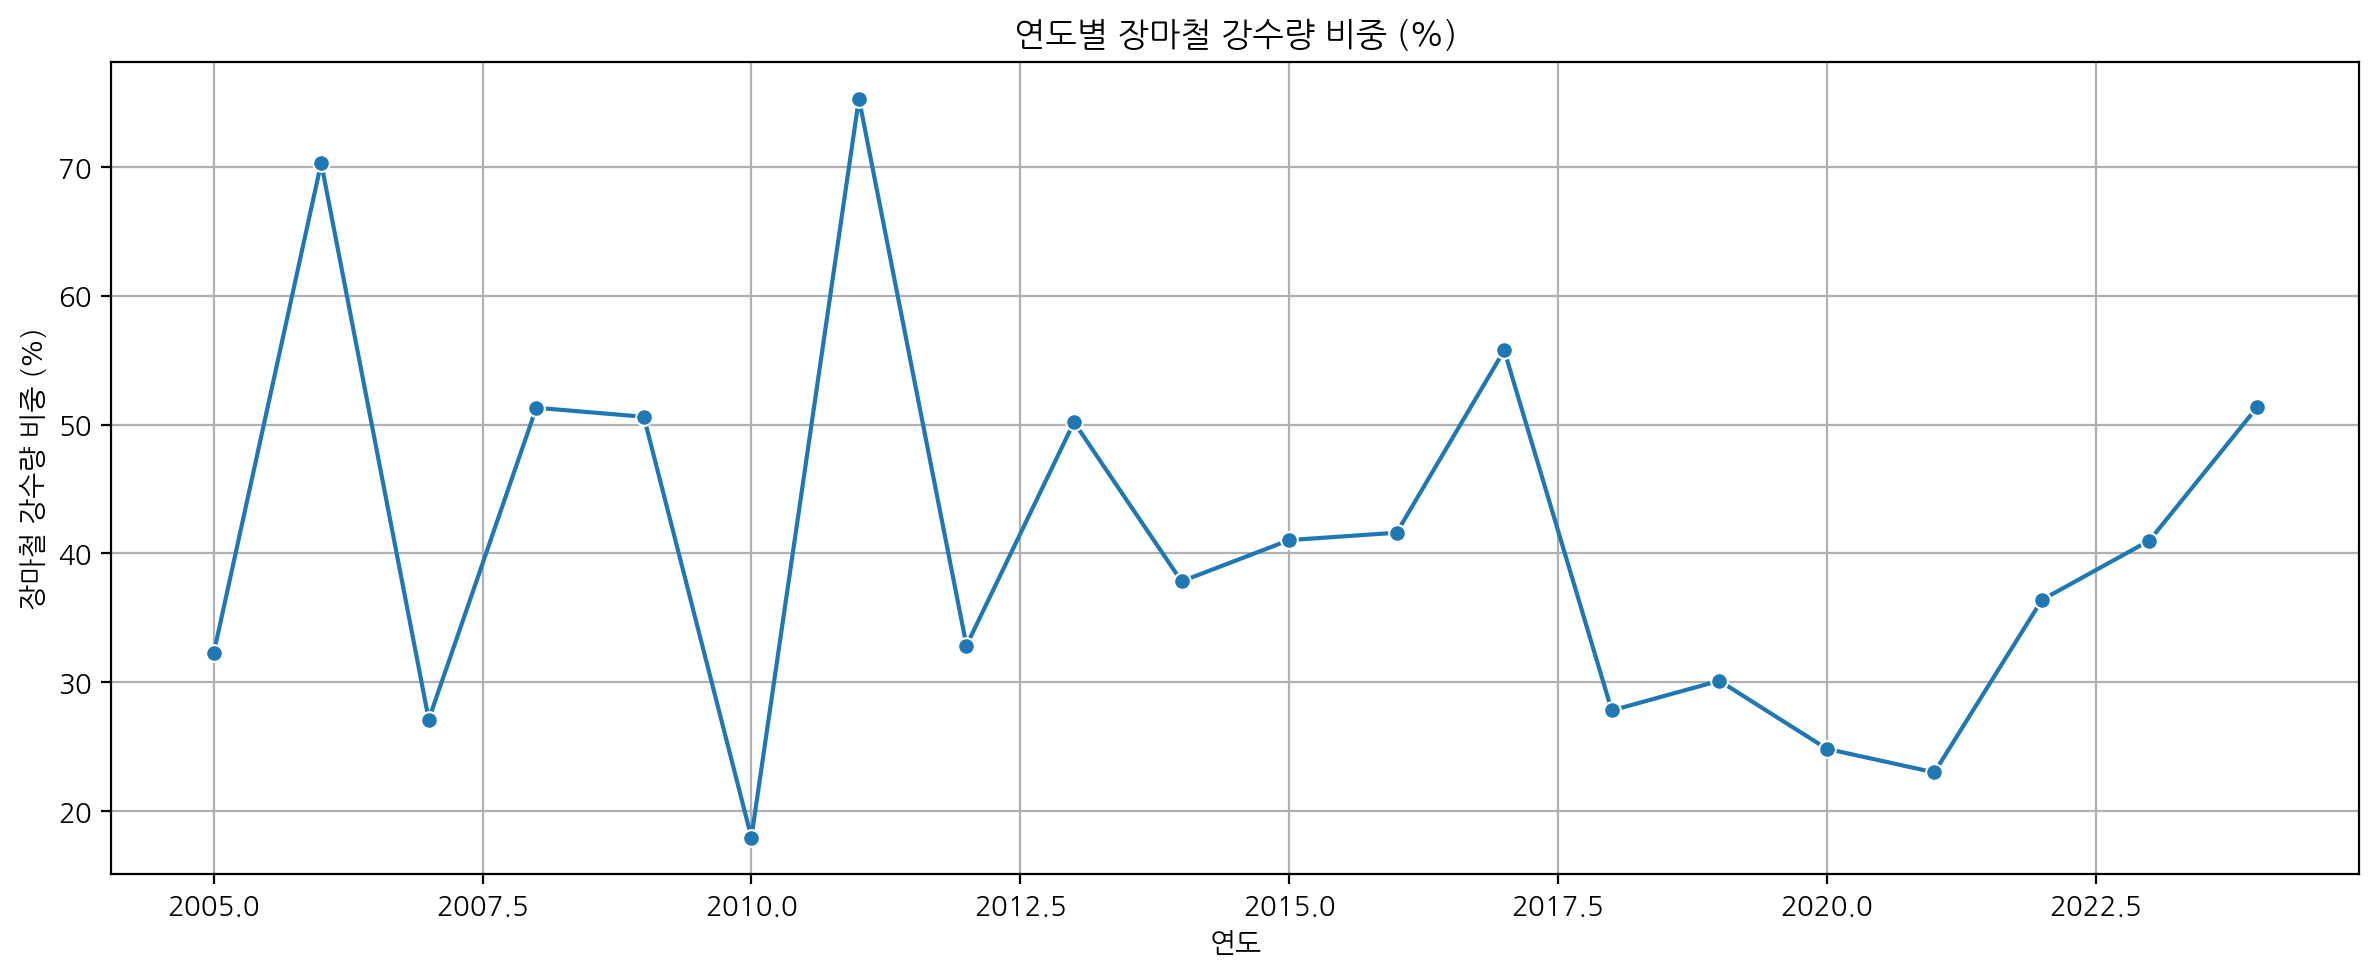

In [ ]:
# 시각화 - 장마철 비중 추이
plt.figure(figsize=(12,5))
sns.lineplot(data=grouped, x=grouped.index, y='장마철비중(%)', marker='o')
plt.title('연도별 장마철 강수량 비중 (%)')
plt.ylabel('장마철 강수량 비중 (%)')
plt.xlabel('연도')
plt.grid(True)
plt.tight_layout()
plt.show()

## 강수량 분포의 변동성 분석

In [ ]:
# 표준편차 또는 IQR(사분위 범위)을 통해 연도별 강수량 변동성 비교.

# IQR: 극단값에 덜 민감한 사분위 범위 기준
# 표준편차: 평균 기준 퍼짐 정도

In [ ]:
# 연도별 월 강수량 집계 (월별 자료가 전제되어 있음)
yearly_stats = df.groupby('연도')[rain_col].agg(['std']).rename(columns={'std': '표준편차'})

# IQR 계산 함수
def calc_iqr(group):
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    return q3 - q1

# 연도별 IQR 추가
yearly_stats['IQR'] = df.groupby('연도')[rain_col].apply(calc_iqr)

# 출력
print("📊 연도별 강수량 변동성 (표준편차 & IQR):")
print(yearly_stats.sort_index(ascending=False).head(10))

📊 연도별 강수량 변동성 (표준편차 & IQR):
            표준편차      IQR
연도                       
2025   47.836210   75.100
2024  147.525356   85.825
2023  133.062469  121.925
2022  178.241845  202.125
2021   69.121318   92.850
2020  188.064193  133.325
2019   65.817656   68.000
2018   75.616250  130.500
2017  181.110184   47.050
2016   95.381964   36.675


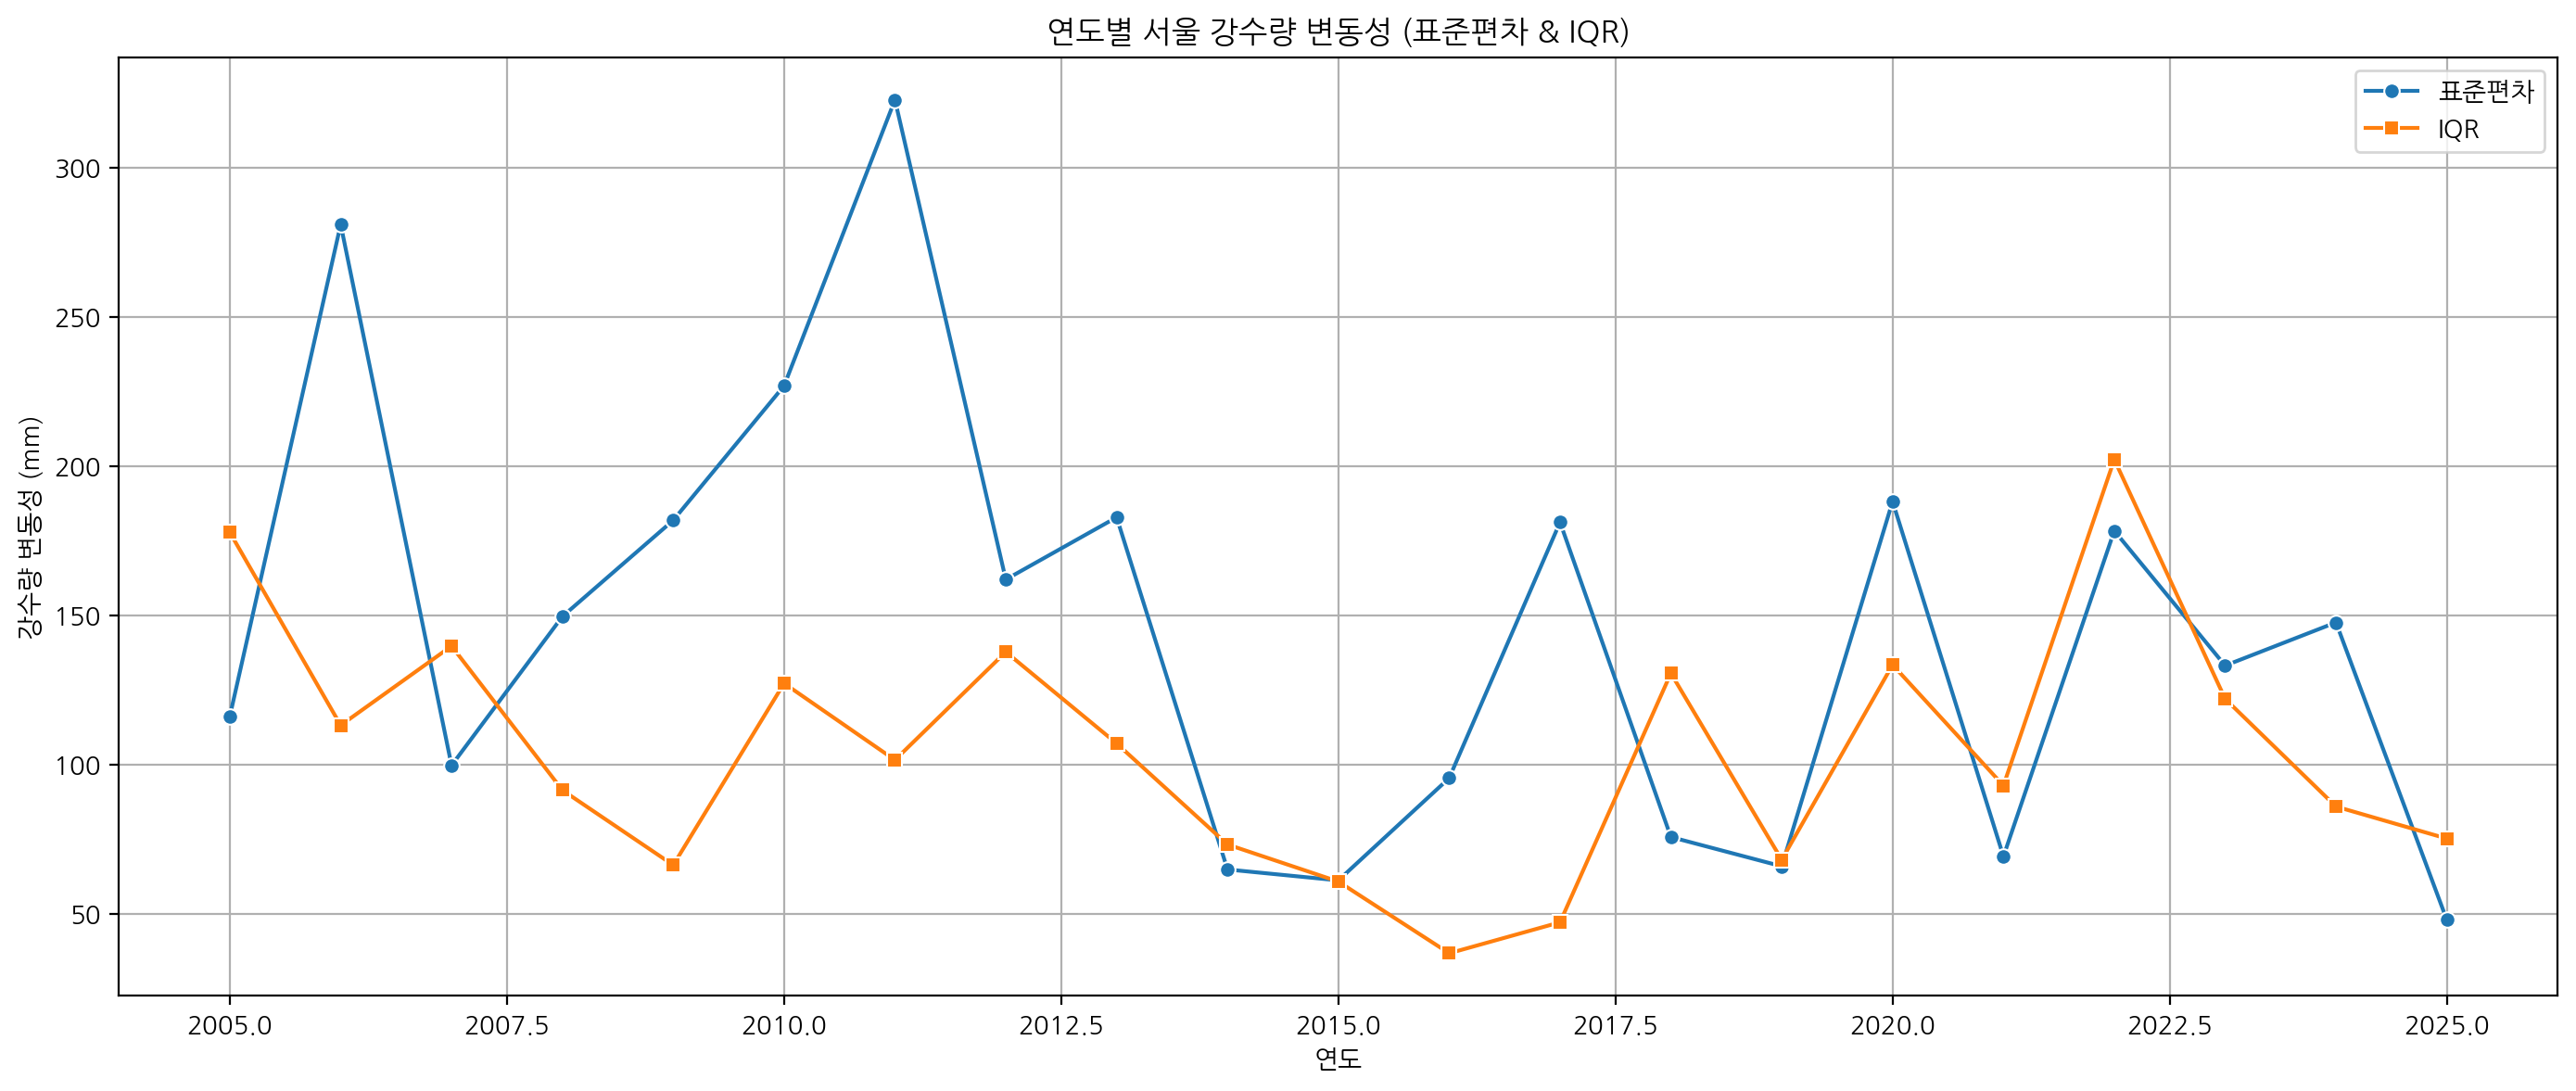

In [ ]:
# 시각화 - 표준편차 & IQR 변화 추이
plt.figure(figsize=(14,6))
sns.lineplot(data=yearly_stats, x=yearly_stats.index, y='표준편차', label='표준편차', marker='o')
sns.lineplot(data=yearly_stats, x=yearly_stats.index, y='IQR', label='IQR', marker='s')
plt.title('연도별 서울 강수량 변동성 (표준편차 & IQR)')
plt.ylabel('강수량 변동성 (mm)')
plt.xlabel('연도')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## 서울의 극단적 강수 사건 시각화

In [ ]:
# 시간별 혹은 특정 날의 기록적인 강수 데이터를 시각적으로 표현.

# 극단값 탐지: 전체 기간 중 월 강수량이 특이하게 높은 달
# 최고 강수량 Top N 시각화: 가장 강수량이 많았던 날들을 시각화
# 극단값(상위 5%) 강수 사건 시각화 (월 단위 기준)

In [ ]:
rain_col = '강수량(mm)'

# 상위 5% 기준 계산
threshold = df[rain_col].quantile(0.95)

# 극단적 강수 사건 필터링
extreme_rain = df[df[rain_col] >= threshold]

# 출력
print("🌧️ 극단적 강수 사건 (상위 5%):")
print(extreme_rain[[rain_col]])

🌧️ 극단적 강수 사건 (상위 5%):
            강수량(mm)
날짜                 
2006-07-01   1014.0
2008-07-01    530.8
2009-07-01    659.4
2010-08-01    598.7
2010-09-01    671.5
2011-07-01   1131.0
2012-08-01    464.9
2013-07-01    676.2
2017-07-01    621.0
2020-08-01    675.7
2022-08-01    564.8
2023-07-01    459.9
2024-07-01    557.3


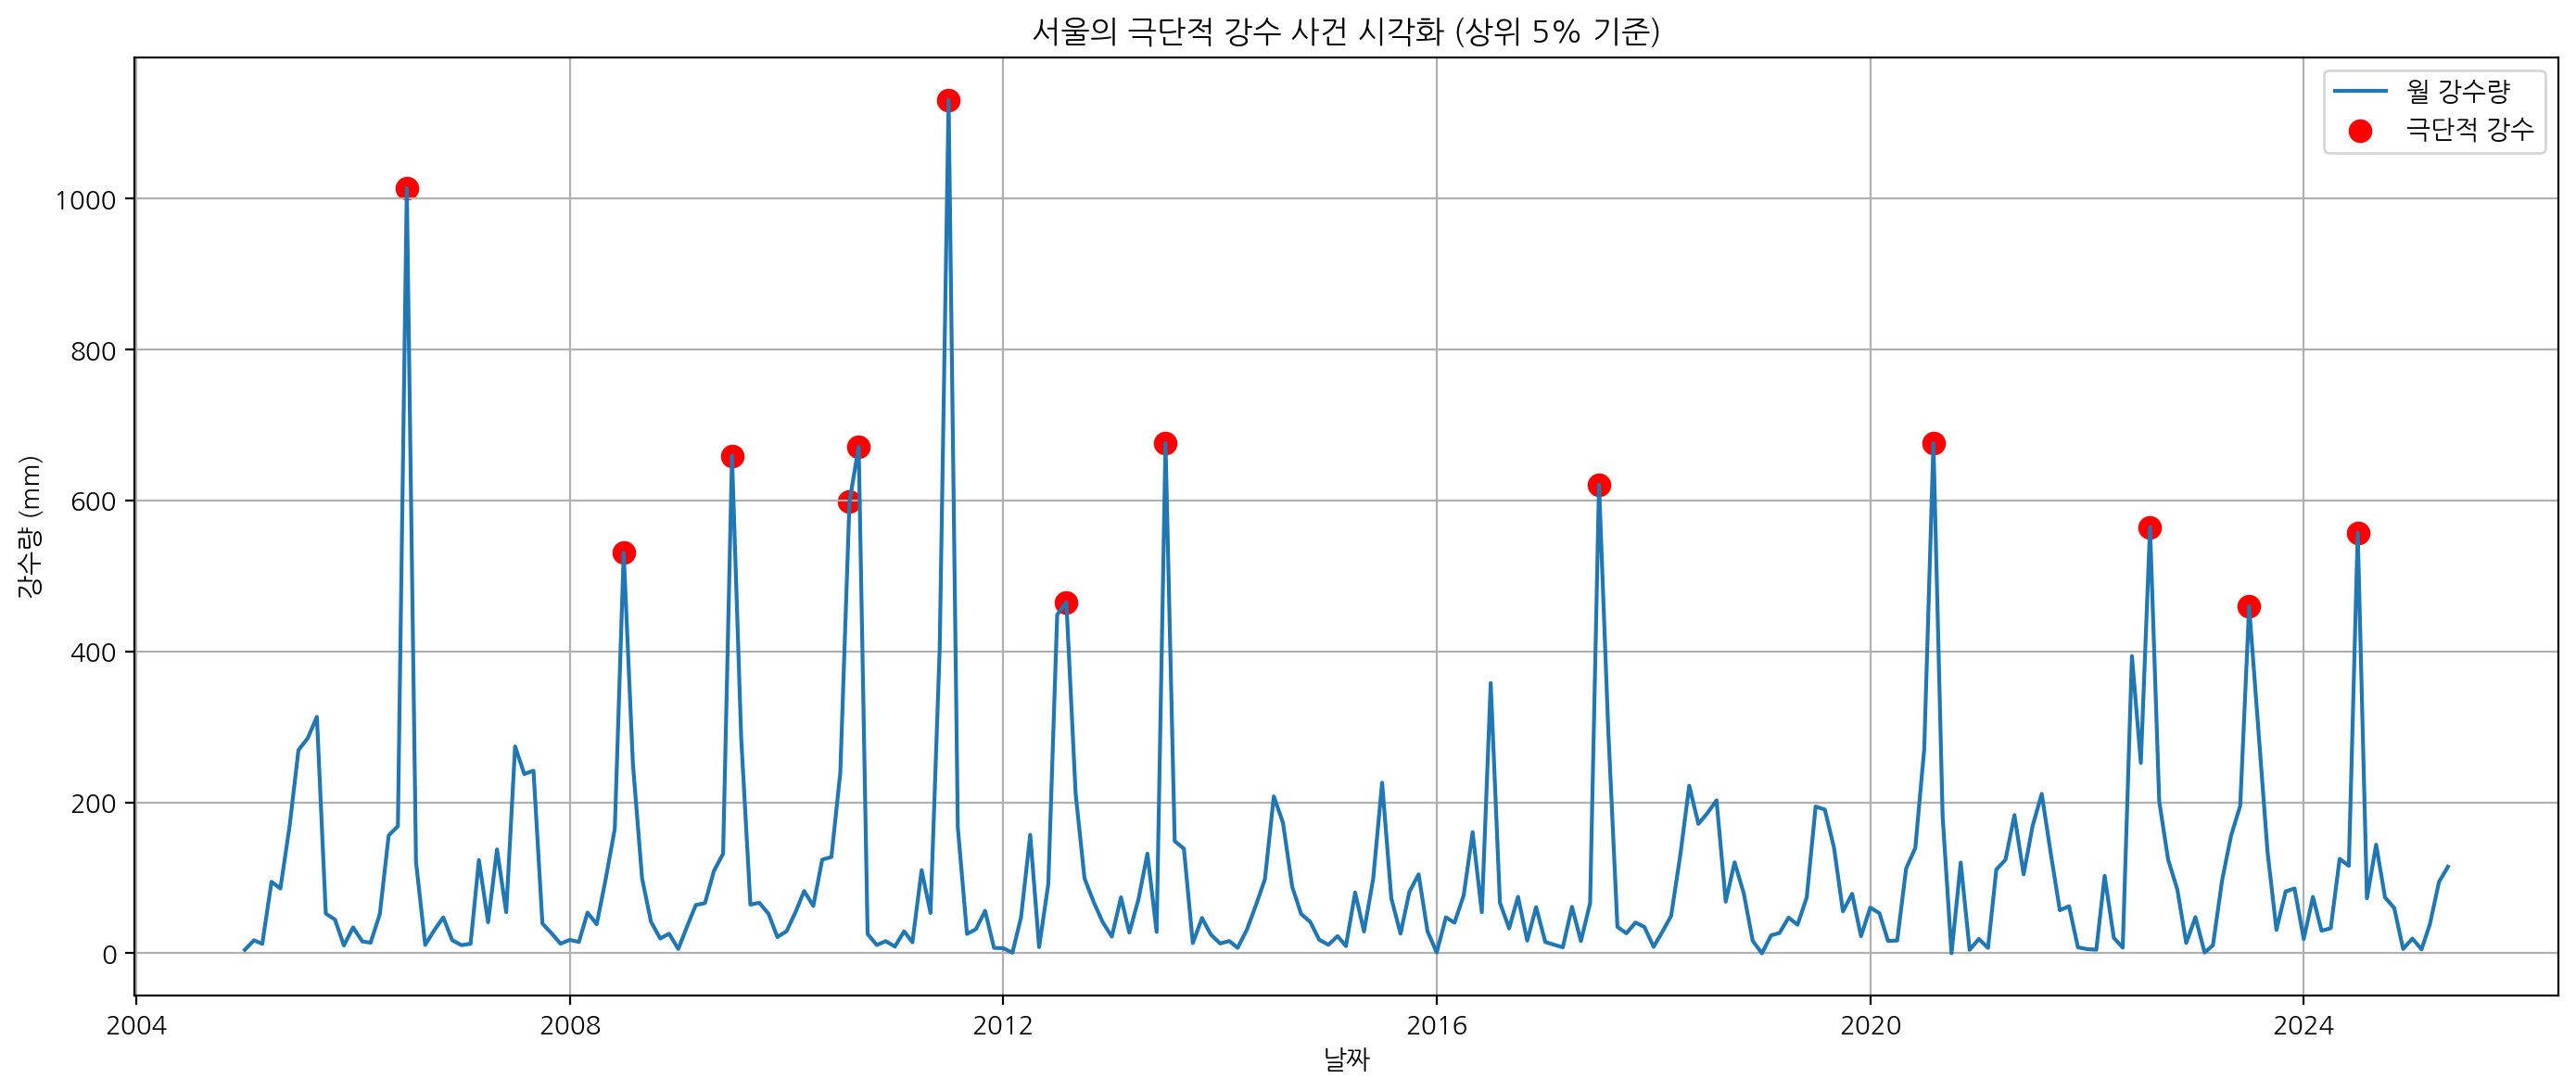

In [ ]:
# 시각화
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x=df.index, y=rain_col, label='월 강수량')
sns.scatterplot(data=extreme_rain, x=extreme_rain.index, y=rain_col, color='red', label='극단적 강수', s=100)
plt.title('서울의 극단적 강수 사건 시각화 (상위 5% 기준)')
plt.xlabel('날짜')
plt.ylabel('강수량 (mm)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-52-8485b0b8af0e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_rain.index.strftime('%Y-%m'), y=top10_rain[rain_col], palette='Reds_r')


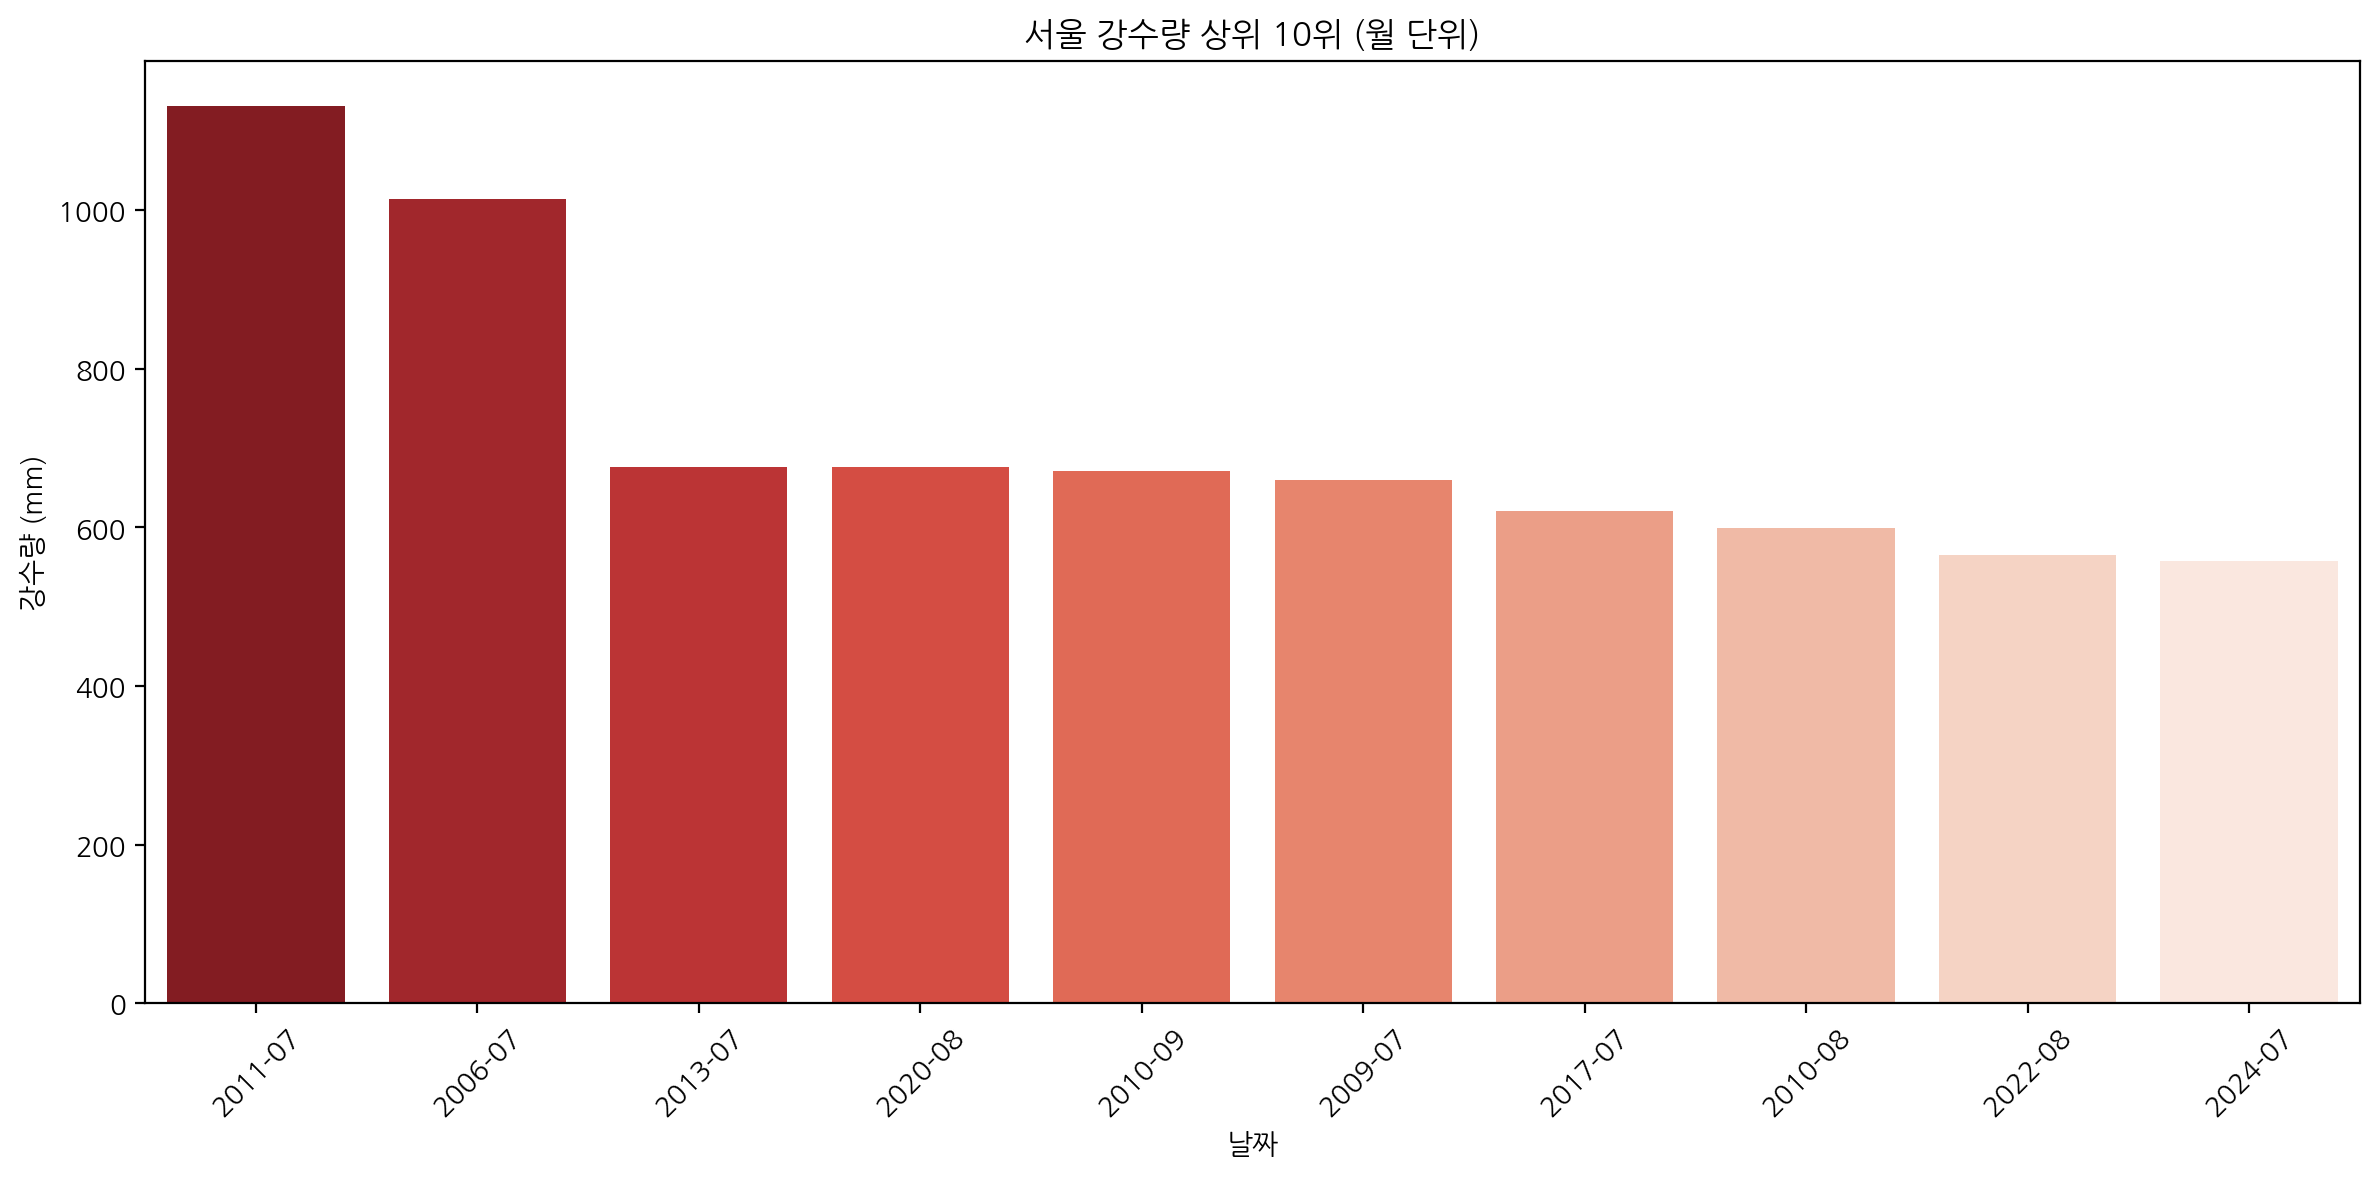

In [ ]:
# 강수량이 가장 많았던 상위 10개 날짜
top10_rain = df.sort_values(by=rain_col, ascending=False).head(10)

# 시각화
plt.figure(figsize=(12,6))
sns.barplot(x=top10_rain.index.strftime('%Y-%m'), y=top10_rain[rain_col], palette='Reds_r')
plt.title('서울 강수량 상위 10위 (월 단위)')
plt.ylabel('강수량 (mm)')
plt.xlabel('날짜')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 장기 추세 분석 및 예측 (시계열 분석)

In [ ]:
# 연도별 혹은 월별 강수량을 시계열 데이터로 모델링해 향후 추세 예측. (Exponential Smoothing 활용)

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# 월별 강수량 시계열 추출
rain_ts = df['강수량(mm)'].asfreq('MS')  # 월 시작 기준 시계열

# 결측값 확인 및 보간 (필요 시)
rain_ts = rain_ts.interpolate()

# 시계열 모델링 (계절성: 12개월 주기, additive 추세)
model = ExponentialSmoothing(
    rain_ts,
    trend='add',
    seasonal='add',
    seasonal_periods=12
).fit()

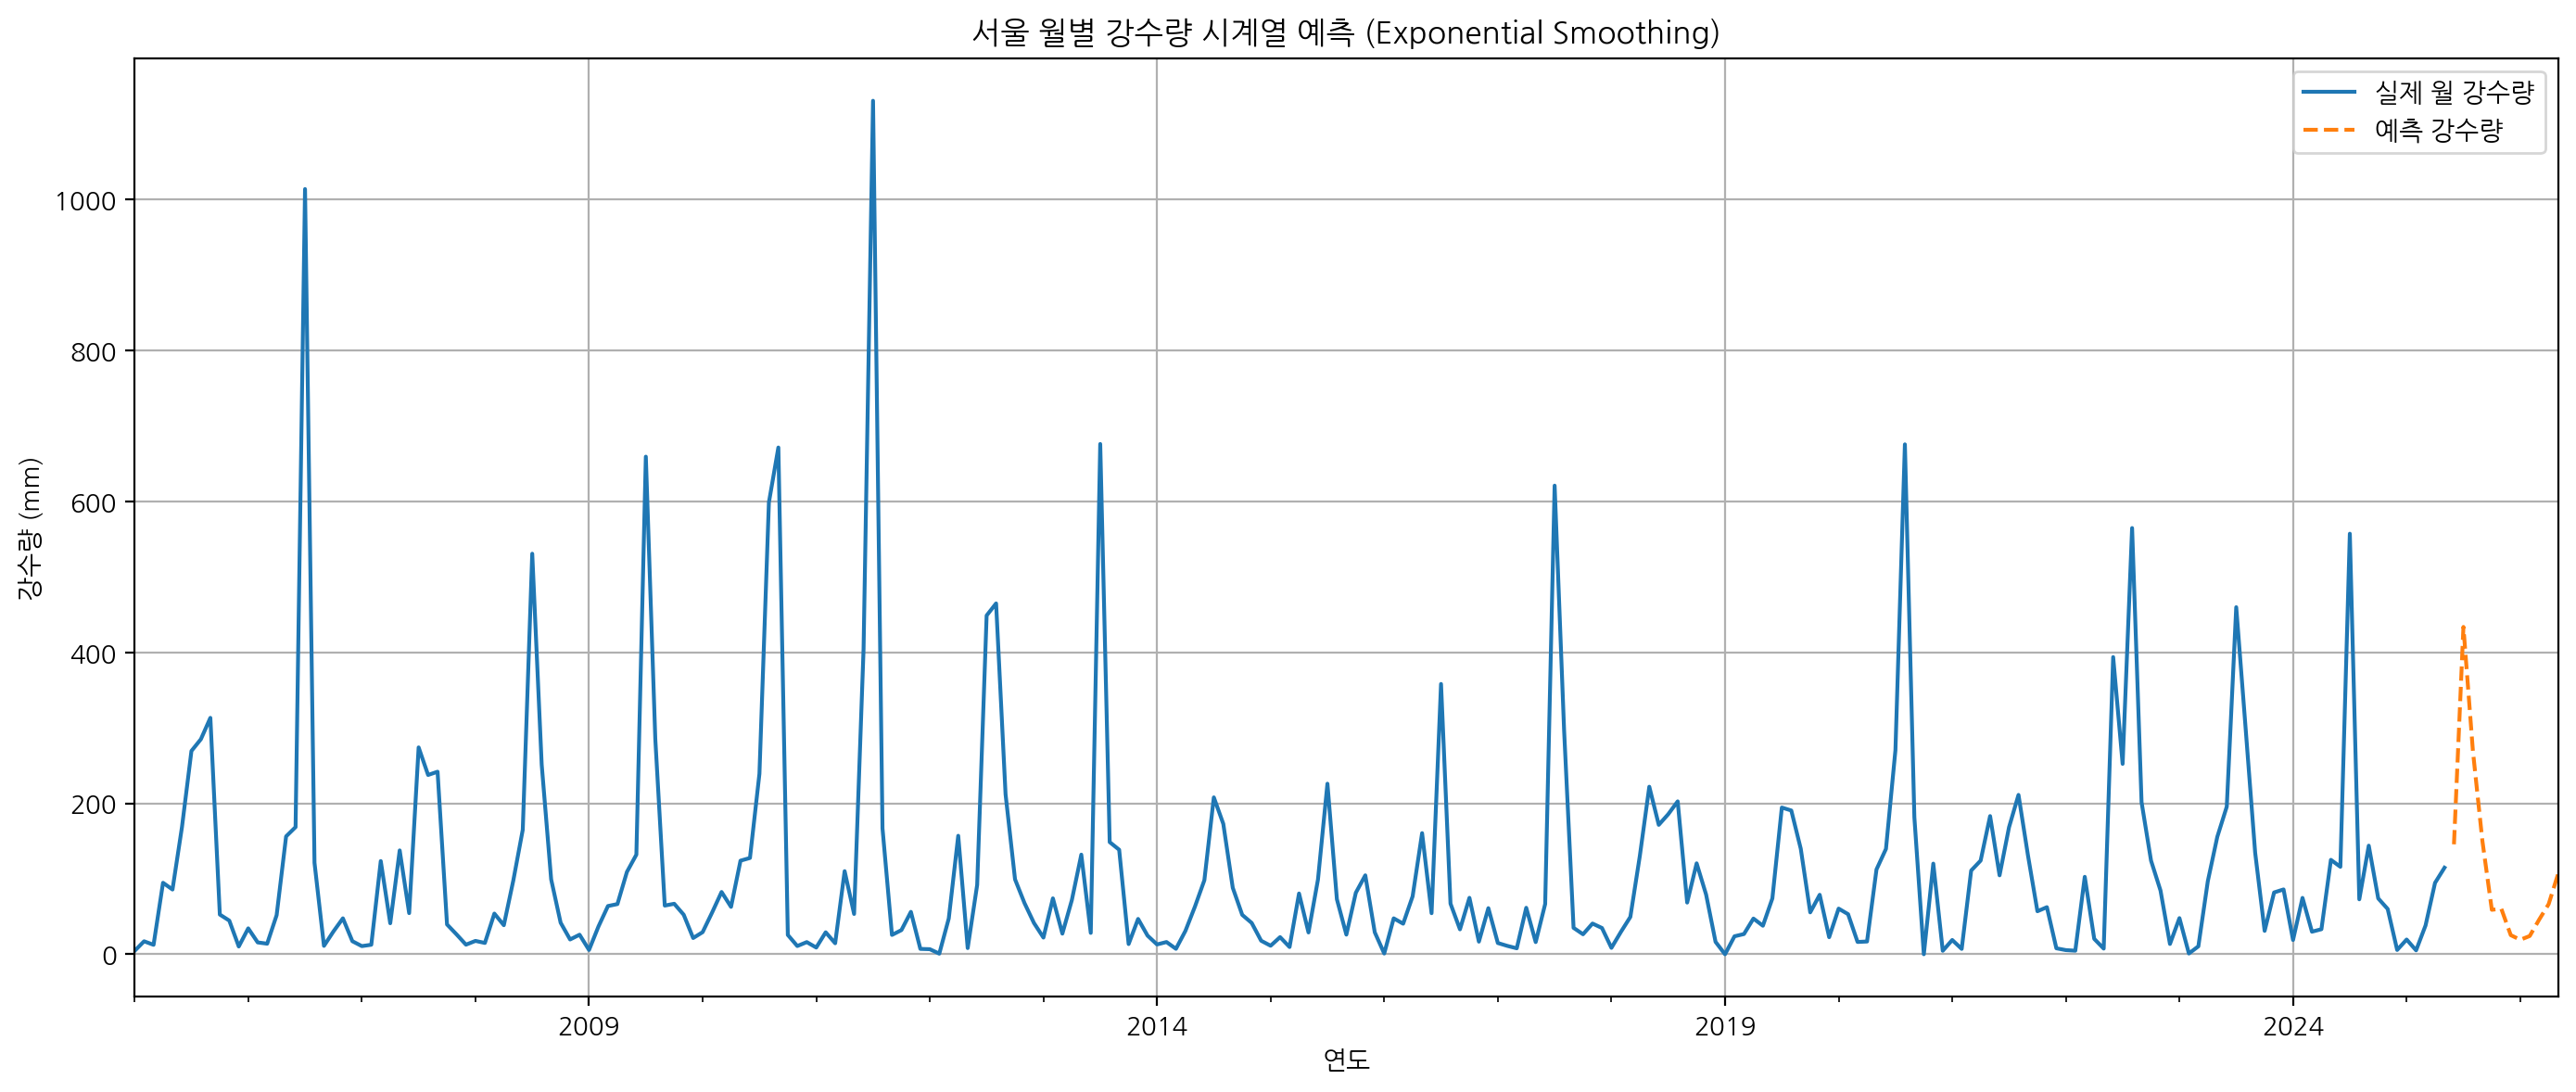

In [ ]:
# 시각화
plt.figure(figsize=(14,6))
rain_ts.plot(label='실제 월 강수량')
forecast.plot(label='예측 강수량', linestyle='--')
plt.title('서울 월별 강수량 시계열 예측 (Exponential Smoothing)')
plt.xlabel('연도')
plt.ylabel('강수량 (mm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 향후 12개월 예측
forecast = model.forecast(12)

# 예측값 출력
print("📈 향후 12개월 강수량 예측:")
print(forecast)

📈 향후 12개월 강수량 예측:
2025-06-01    145.696668
2025-07-01    433.782058
2025-08-01    269.504620
2025-09-01    150.438120
2025-10-01     58.913654
2025-11-01     60.389207
2025-12-01     25.332858
2026-01-01     19.184595
2026-02-01     24.159498
2026-03-01     45.916210
2026-04-01     66.361219
2026-05-01    106.475089
Freq: MS, dtype: float64
